In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes 
from scipy import stats
from scipy.io import loadmat
from scipy.stats import pearsonr
from sklearn.neighbors import KernelDensity
import pymc3

C:\ProgramData\Anaconda3\lib\site-packages\distributed\utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  % (host, default, e), RuntimeWarning)


# Fig. 1: Fixed delay data and model

In [ ]:
def gen_val_fixed(hier,M):  
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]
    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    true_A=np.random.gamma(a_A,1./b_A,size=M)
    #alpha
    a2=hier['adelay'][np.random.randint(L,size=M)]
    b2=hier['bdelay'][np.random.randint(L,size=M)]
    hier_delay=np.random.gamma(a2,np.divide(1,b2))
    true_delay=np.random.gamma(a_delay,1./b_delay,size=M)
    return hier_A, true_A, hier_delay, true_delay

def gen_val_full_fixed(hier,M):  
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    true_A=np.random.gamma(a_A,1./b_A,size=M)
    #B
    a2=hier['aB'][np.random.randint(L,size=M)]
    b2=hier['bB'][np.random.randint(L,size=M)]
    hier_B=np.random.gamma(a2,np.divide(1,b2))
    true_B=np.random.gamma(a_B,1./b_B,size=M)
    #delay
    a3=hier['adelay'][np.random.randint(L,size=M)]
    b3=hier['bdelay'][np.random.randint(L,size=M)]
    hier_delay=np.random.gamma(a3,np.divide(1,b3))
    true_delay=np.random.gamma(a_delay,1./b_delay,size=M)
    return hier_A, true_A, hier_B, true_B, hier_delay, true_delay

def plot_trajectory_fixed(x,col,cell_number,trajectory_length):
    axes[0,0].plot(x[:trajectory_length+1,:cell_number+1],c=col,alpha=0.3,linewidth=0.5)
    axes[0,0].set_xticks(np.linspace(0,40,3))
    axes[0,0].set_yticks(np.linspace(0,1600,3))
    axes[0,0].set_xticklabels([0,20,40],fontsize=fontsiz)
    axes[0,0].set_yticklabels([0,800,1600],fontsize=fontsiz)
    axes[0,0].set_xlim((0,trajectory_length))
    axes[0,0].set_ylim((0,1600))
    axes[0,0].set_xlabel('Time (min)',fontsize=fontsiz)
    axes[0,0].set_ylabel('Mol. count',fontsize=fontsiz)
    axes[0,0].spines['right'].set_color('none')
    axes[0,0].spines['top'].set_color('none')
    
def plot_hierarchical_fixed(hier_A,hier_delay,labels,col):
    sns.kdeplot(hier_A, shade=True,ax=axes[0],color=col,linewidth=0.5)  #hierarchical density
    sns.scatterplot([np.mean(hier_A)],[0.003],marker='v',s=20,ax=axes[0],linewidth=0.5)
    sns.kdeplot(hier_delay, shade=True,ax=axes[1],color=col,linewidth=0.5)  #hierarchical density
    sns.scatterplot([np.mean(hier_delay)],[0.015],marker='v',s=20,ax=axes[1],linewidth=0.5)

def plot_true_fixed(true_A,true_delay,labels,col):
    sns.kdeplot(true_A,shade=True,ax=axes[0],color=col,linewidth=0.5)
    sns.scatterplot([np.mean(true_A)],[-0.0018],marker='^',s=20,ax=axes[0],clip_on=False)
    axes[0].set_xlim([0,100])
    axes[0].set_ylim([0,0.04])
    axes[0].set_xticks(np.linspace(0,100,3))
    axes[0].set_yticks(np.linspace(0,0.04,3))
    axes[0].set_xticklabels([0,50,100],fontsize=fontsiz)
    axes[0].set_yticklabels([0,0.02,0.04],fontsize=fontsiz)
    sns.kdeplot(true_delay,shade=True,ax=axes[1],color=col,linewidth=0.5)
    sns.scatterplot([np.mean(true_delay)],[-0.009],marker='^',s=20,ax=axes[1],clip_on=False)
    axes[1].set_xlim([0,30])
    axes[1].set_ylim([0,0.2])
    axes[1].set_xticks(np.linspace(0,30,3))
    axes[1].set_yticks(np.linspace(0,0.2,3))
    axes[1].set_xticklabels([0,15,30],fontsize=fontsiz)
    axes[1].set_yticklabels([0,0.1,0.2],fontsize=fontsiz)
    xlabels = [r'$A$',r'$\tau$']
    for i in range(2):
        axes[i].set_xlabel(xlabels[i],fontsize=fontsiz)
        axes[i].spines['right'].set_color('none')
        axes[i].spines['top'].set_color('none')
    axes[0].set_ylabel('PDF',fontsize=fontsiz)
    

In [ ]:
###################################################### 2 column format ###############################################

hier40 = loadmat('fixed_40.mat',squeeze_me=True)
hier30 = loadmat('fixed_30.mat',squeeze_me=True)
hier20 = loadmat('fixed_20.mat',squeeze_me=True)

a_A=8
b_A=0.23
a_B=9
b_B=625

a_delay=7
b_delay=1
M=1000000
hier_A20, true_A20, hier_delay20, true_delay20 = gen_val_fixed(hier20,M)
hier_A40, true_A40, hier_delay40, true_delay40 = gen_val_fixed(hier40,M)

fontsiz=6   

####### Fixing B################
fixed40 = loadmat('fixed_full_40.mat',squeeze_me=True)
fixed100 = loadmat('fixed_full_100.mat',squeeze_me=True)
pd_subsampled_x=pd.read_csv("subsampled.csv")
x= pd_subsampled_x.values

A40, true_A40, B40, true_B40,delay40, true_delay40 = gen_val_full_fixed(fixed40,M)
A100, true_A100, B100, true_B100, delay100, true_delay100 = gen_val_full_fixed(fixed100,M)

T=100
col=['C1','darkslategrey']

def format_plots(typ):
    for i in range(2):
        axes[i].spines['right'].set_color('none')
        axes[i].spines['top'].set_color('none')
        axes[i].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    if typ=='A':
        axes[0].set_xlim([0,100])
        axes[0].set_xticks([0,50,100])
        axes[0].set_ylim([0,3200])
        axes[0].set_yticks([0,1600,3200])
        axes[1].set_xlim([-0.05,1.5])
        axes[1].set_ylim([-0.05,1.5])
        axes[1].set_xticks([0,0.5,1,1.5])
        axes[1].set_yticks([0,0.5,1,1.5])
        axes[1].hlines(1,-0.05,1.5,alpha=0.4,linewidth=0.4,color='k')   
        axes[1].vlines(1,-0.05,1.5,alpha=0.4,linewidth=0.4,color='k')
    elif typ=='B':
        for i in range(2):
            axes[i].set_xlim([-0.05,1.5])
            axes[i].set_ylim([-0.05,1.5])
            axes[i].set_xticks([0,0.5,1,1.5])
            axes[i].set_yticks([0,0.5,1,1.5])
            axes[i].hlines(1,-0.05,1.5,alpha=0.4,linewidth=0.4,color='k')   
            axes[i].vlines(1,-0.05,1.5,alpha=0.4,linewidth=0.4,color='k')
    plt.tight_layout(w_pad=0.5,h_pad=-0.1)
    
f,axes = plt.subplots(1,2,figsize=(3.4,1.3))
axes[0].plot(x[:T+1,:],alpha=0.3,c='slategrey',linewidth=0.5)
axes[0].hlines(np.max(x[39,:]),0,40,alpha=0.4,linewidth=0.5,color='r')   
axes[0].vlines(40,0,np.max(x[39,:]),alpha=0.4,linewidth=0.5,color='r')  
axes[0].set_xlabel('Time (min.)',fontsize=fontsiz)
axes[0].set_ylabel('Mol. count',fontsize=fontsiz)

axes[1].scatter(np.mean(fixed40['A'],0)/fixed40['A1'],np.mean(fixed40['B'],0)/fixed40['B1'],s=fontsiz-2,alpha=0.5,linewidth=0,c=col[0])
axes[1].scatter(np.mean(fixed100['A'],0)/fixed100['A1'],np.mean(fixed100['B'],0)/fixed100['B1'],s=fontsiz-2,alpha=0.5,linewidth=0,c=col[1])
axes[1].set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
axes[1].set_ylabel(r'Norm. $\hat{B}_n$',fontsize=fontsiz)
axes[1].text(0.1,1.4,'100 min',color=col[1],fontsize=fontsiz)
axes[1].text(0.1,1.15,'40 min',color=col[0],fontsize=fontsiz)
format_plots('A')
axes[0].text(-45,3200,'(b)',fontsize=fontsiz+1)
axes[1].text(-0.68,1.5,'(c)',fontsize=fontsiz+1)
f.savefig('fig1_full_fixedA.jpg', format='jpg', dpi=500,bbox_inches="tight")

f,axes = plt.subplots(1,2,figsize=(3.4,1.3))
axes[0].scatter(np.mean(fixed40['delay'],0)/fixed40['delay1'],np.mean(fixed40['A'],0)/fixed40['A1'],s=fontsiz-2,alpha=0.5,linewidth=0,c=col[0])
axes[0].scatter(np.mean(fixed100['delay'],0)/fixed100['delay1'],np.mean(fixed100['A'],0)/fixed100['A1'],s=fontsiz-2,alpha=0.5,linewidth=0,c=col[1])
axes[0].set_xlabel(r'Norm. $\hat{\tau}_n$',fontsize=fontsiz)
axes[0].set_ylabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)

axes[1].scatter(np.mean(hier40['delay'],0)/hier40['delay1'],np.mean(hier40['A'],0)/hier40['A1'],s=fontsiz-2,alpha=0.5,linewidth=0,c=col[0])
axes[1].set_xlabel(r'Norm. $\hat{\tau}_n$',fontsize=fontsiz)
axes[1].set_ylabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
format_plots('B')
axes[0].text(-0.73,1.5,'(d)',fontsize=fontsiz+1)
axes[1].text(-0.67,1.5,'(e)',fontsize=fontsiz+1)
f.savefig('fig1_full_fixedB.jpg', format='jpg', dpi=500,bbox_inches="tight")

#individual parameter normalized 
pd_subsampled_x=pd.read_csv("subsampled.csv")
x= pd_subsampled_x.values
f,axes=plt.subplots(1,2,figsize=(3.4,1.3))

#population distribution
sns.set_context(rc={"lines.linewidth": 1})
plot_hierarchical_fixed(hier_A20,hier_delay20,'20 cells','C0')
plot_hierarchical_fixed(hier_A40,hier_delay40,'40 cells','C1')
plot_true_fixed(true_A40,true_delay40,'true density','C2')
plt.tight_layout(w_pad=0)
axes[1].text(12,0.17,'20 cells',fontsize=fontsiz,color='C0')
axes[1].text(12,0.14,'40 cells',fontsize=fontsiz,color='C1')
axes[1].text(12,0.11,'true',fontsize=fontsiz,color='C2')
axes[0].text(-40,0.04,'(f)',fontsize=fontsiz+1)
f.savefig('fig1_fixed_estimates.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. 2: Mean delay time estimation

In [ ]:
def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A, hier_mean_delay, hier_delay    

def gen_val_fixed(hier,M):  #generate population level distribution here
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))

    a2=hier['adelay'][np.random.randint(L,size=M)]
    b2=hier['bdelay'][np.random.randint(L,size=M)]
    hier_delay=np.random.gamma(a2,np.divide(1,b2))
    return hier_A, hier_delay

def gen_val_true_distribution(data,a_alpha,b_alpha,a_beta,b_beta,M):
    N=np.shape(data['A'])[1]
    true_alpha=np.random.gamma(a_alpha,1./b_alpha,size=M)
    true_beta=np.random.gamma(a_beta,1./b_beta,size=M)
    true_ind_delay=np.zeros([M,N])
    for i in range(N):
        true_ind_delay[:,i]=np.random.gamma(data['alpha1'][i],1./data['beta1'][i],size=M)
    true_delay=true_ind_delay.flatten() 
    return true_delay


def plot_individual(data1,data2,data3,typ): 
    if typ=='mdip':
        A1, mean_delay1, delay1 = gen_val_distributed(data1,M)
        A2, mean_delay2, delay2 = gen_val_distributed(data2,M)
        A3, mean_delay3, delay3 = gen_val_distributed(data3,M)
        col='crimson'    
    elif typ == 'ratio':
        A1, mean_delay1, delay1 = gen_val_distributed(data1,M)
        A2, mean_delay2, delay2 = gen_val_distributed(data2,M)
        A3, mean_delay3, delay3 = gen_val_distributed(data3,M)
        col='steelblue'
    else:
        A1, delay1 = gen_val_fixed(data1,M)
        A2, delay2 = gen_val_fixed(data2,M)
        A3, delay3 = gen_val_fixed(data3,M)
        col='C1'
    
    if typ=='fixed':
        axes[0,0].scatter(np.mean(data1['A'],0)/data1['A1'],np.mean(data1['delay'],0)/(data1['alpha1']/data1['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        axes[0,1].scatter(np.mean(data2['A'],0)/data2['A1'],np.mean(data2['delay'],0)/(data2['alpha1']/data2['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        axes[0,2].scatter(np.mean(data3['A'],0)/data3['A1'],np.mean(data3['delay'],0)/(data3['alpha1']/data3['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    else:
        axes[0,0].scatter(np.mean(data1['A'],0)/data1['A1'],mean_delay1/(data1['alpha1']/data1['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        axes[0,1].scatter(np.mean(data2['A'],0)/data2['A1'],mean_delay2/(data2['alpha1']/data2['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        axes[0,2].scatter(np.mean(data3['A'],0)/data3['A1'],mean_delay3/(data3['alpha1']/data3['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        

    sns.kdeplot(A1,shade=True,ax=axes[1,0],linewidth=0.5,color=col)
    sns.kdeplot(A2,shade=True,ax=axes[1,1],linewidth=0.5,color=col)
    sns.kdeplot(A3,shade=True,ax=axes[1,2],linewidth=0.5,color=col) 
    sns.scatterplot([np.mean(A1)],[0.003],marker='v',s=20,ax=axes[1,0],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(A2)],[0.003],marker='v',s=20,ax=axes[1,1],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(A3)],[0.003],marker='v',s=20,ax=axes[1,2],linewidth=0.5,color=col)  
    
    sns.kdeplot(delay1,shade=True,ax=axes[2,0],linewidth=0.5,color=col)
    sns.kdeplot(delay2,shade=True,ax=axes[2,1],linewidth=0.5,color=col)
    if typ=='mdip':
        model = KernelDensity(kernel='gaussian', bandwidth=0.4)
        model.fit(delay3[:20000][:,None])
        x_test=np.linspace(-1,20,10000)
        log_dens = model.score_samples(x_test[:,None])
        axes[2,2].plot(x_test,np.exp(log_dens),c=col,linewidth=0.4)
        axes[2,2].fill(x_test, np.exp(log_dens), c=col,alpha=0.2)
    else:
        sns.kdeplot(delay3,shade=True,ax=axes[2,2],linewidth=0.5,color=col) 
    sns.scatterplot([np.mean(delay1)],[0.03],marker='v',s=20,ax=axes[2,0],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(delay2)],[0.03],marker='v',s=20,ax=axes[2,1],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(delay3)],[0.03],marker='v',s=20,ax=axes[2,2],linewidth=0.5,color=col)
    
    axes[0,0].set_ylabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axes[1,0].set_ylabel('PDF',fontsize=fontsiz)
    axes[2,0].set_ylabel('PDF',fontsize=fontsiz)
    
    
    for i in range(3):
        axes[0,i].set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
        axes[1,i].set_xlabel(r'$A$',fontsize=fontsiz)
        axes[2,i].set_xlabel(r'$\tau$',fontsize=fontsiz)
        

In [ ]:
fixed1 = loadmat('fixed_var35.mat',squeeze_me=True)
fixed2 = loadmat('fixed_var7.mat',squeeze_me=True)
fixed3 = loadmat('fixed_var14.mat',squeeze_me=True)

mdip1 = loadmat('mdip_var35.mat',squeeze_me=True)
mdip2 = loadmat('mdip_var7.mat',squeeze_me=True)
mdip3 = loadmat('mdip_var14.mat',squeeze_me=True)

ratio1 = loadmat('rational_var35.mat',squeeze_me=True)
ratio2 = loadmat('rational_var7.mat',squeeze_me=True)
ratio3 = loadmat('rational_var14.mat',squeeze_me=True)

N=np.shape(mdip1['A'])[1]
M=1000000
    
a_A=8
b_A=0.23
a_alpha=[84, 63, 35] 
b_alpha=[6, 9, 10]
a_beta=[10, 10, 10]
b_beta=[5, 10, 20]


pd_subsampled_x35=pd.read_csv("subsampled_var35.csv")
pd_subsampled_x7=pd.read_csv("subsampled_var7.csv")
pd_subsampled_x14=pd.read_csv("subsampled_var14.csv")
x_var35= pd_subsampled_x35.values
x_var7= pd_subsampled_x7.values
x_var14= pd_subsampled_x14.values

fontsiz=6
f, axes = plt.subplots(1,3,figsize=(3.5,1.3))
axes[0].plot(x_var35,alpha=0.3,c='lightgreen',linewidth=0.5)
axes[1].plot(x_var7,alpha=0.3,c='mediumseagreen',linewidth=0.5)
axes[2].plot(x_var14,alpha=0.3,c='darkgreen',linewidth=0.5)
for i in range(3):
    axes[i].spines['right'].set_color('none')
    axes[i].spines['top'].set_color('none')
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    axes[i].set_xlim([0,40])
    axes[i].set_yticks([0,1000,2000])
    if i>0:
        axes[i].set_yticklabels([])
    axes[i].set_ylim([0,2000])
axes[1].set_xlabel('Time (min)',fontsize=fontsiz)
axes[0].set_ylabel('Mol. count',fontsize=fontsiz)
axes[0].text(5,1800,r'$\sigma_{\tau_n}^2 \approx 3.5$',fontsize=fontsiz)
axes[1].text(5,1800,r'$\sigma_{\tau_n}^2 \approx 7$',fontsize=fontsiz)
axes[2].text(5,1800,r'$\sigma_{\tau_n}^2 \approx 14$',fontsize=fontsiz)
plt.tight_layout()
axes[0].text(-30,2000,'(c)',fontsize=fontsiz+1)
f.savefig('fig2_trajectories_dist.jpg', format='jpg', dpi=500,bbox_inches="tight")

f, axes = plt.subplots(1,4,figsize=(3.5,0.1))
axes[0].text(0.5,0.5,'Fixed',color='C1',fontsize=fontsiz,ha='center', va='center')
axes[1].text(0.5,0.5,'Rational',color='steelblue',fontsize=fontsiz,ha='center', va='center')
axes[2].text(0.5,0.5,'MDIP',color='crimson',fontsize=fontsiz,ha='center', va='center')
axes[3].text(0.5,0.5,'True',color='C2',fontsize=fontsiz,ha='center', va='center')
for i in range(4):
    axes[i].axis('off')
f.savefig('fig2_delay_compare_heading.jpg', format='jpg', dpi=500,bbox_inches="tight")

f, axes = plt.subplots(3,3,figsize=(3.5,3.3))
true_A=np.random.gamma(a_A,1./b_A,size=M)
titles=[r'$\sigma_{\tau_n}^2\approx 3.5$',r'$\sigma_{\tau_n}^2\approx 7$',r'$\sigma_{\tau_n}^2\approx 14$']
for j in range(3):
    sns.kdeplot(true_A,shade=True,ax=axes[1,j],linewidth=0.5,color='C2')
    sns.scatterplot([np.mean(true_A)],[-0.002],marker='^',s=20,ax=axes[1,j],linewidth=0.5,color='C2',clip_on=False)
    axes[0,j].set_xlim([0,2])
    axes[0,j].set_ylim([0,2])
    axes[0,j].hlines(1,0,2,alpha=0.3,linewidth=0.5)
    axes[0,j].vlines(1,0,2,alpha=0.3,linewidth=0.5)
    axes[1,j].set_xlim([0,90])
    axes[1,j].set_ylim([0,0.04])
    axes[2,j].set_xlim([0,20])
    axes[2,j].set_ylim([0,0.4])
    for i in range(3):
        axes[i,j].set_title(titles[j],fontsize=fontsiz,y=0.95)
        axes[i,j].spines['right'].set_color('none')
        axes[i,j].spines['top'].set_color('none')
        axes[i,j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
        if j>0:
            axes[i,j].set_yticklabels([])
axes[0,0].text(-1.2,2,'(d)',fontsize=fontsiz+1)
axes[0,1].text(-0.6,2,'(e)',fontsize=fontsiz+1)
axes[0,2].text(-0.6,2,'(f)',fontsize=fontsiz+1)
axes[1,0].text(-57,0.04,'(g)',fontsize=fontsiz+1)
axes[1,1].text(-27,0.04,'(h)',fontsize=fontsiz+1)
axes[1,2].text(-27,0.04,'(i)',fontsize=fontsiz+1)
axes[2,0].text(-12.1,0.4,'(j)',fontsize=fontsiz+1)
axes[2,1].text(-5.8,0.4,'(k)',fontsize=fontsiz+1)
axes[2,2].text(-5.8,0.4,'(l)',fontsize=fontsiz+1)

plot_individual(mdip1,mdip2,mdip3,'mdip')
plot_individual(ratio1,ratio2,ratio3,'ratio')
plot_individual(fixed1,fixed2,fixed3,'fixed')
true_delay1=gen_val_true_distribution(mdip1,a_alpha[0],b_alpha[0],a_beta[0],b_beta[0],M)
true_delay2=gen_val_true_distribution(mdip2,a_alpha[1],b_alpha[1],a_beta[1],b_beta[1],M)
true_delay3=gen_val_true_distribution(mdip3,a_alpha[2],b_alpha[2],a_beta[2],b_beta[2],M)
sns.kdeplot(true_delay1,shade=True,ax=axes[2,0],linewidth=0.5,color='C2')
sns.kdeplot(true_delay2,shade=True,ax=axes[2,1],linewidth=0.5,color='C2')
sns.kdeplot(true_delay3,shade=True,ax=axes[2,2],linewidth=0.5,color='C2')
sns.scatterplot([np.mean(true_delay1)],[-0.02],marker='^',s=20,ax=axes[2,0],linewidth=0.5,color='C2',clip_on=False)    
sns.scatterplot([np.mean(true_delay2)],[-0.02],marker='^',s=20,ax=axes[2,1],linewidth=0.5,color='C2',clip_on=False) 
sns.scatterplot([np.mean(true_delay3)],[-0.02],marker='^',s=20,ax=axes[2,2],linewidth=0.5,color='C2',clip_on=False)

plt.tight_layout(w_pad=0,h_pad=0.1)
f.savefig('fig2_delay_compare.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. 3: Hierarchical vs Nonhierarchical model

In [ ]:
def gen_val_nonhierarchical(nonhier,M):
    size=np.shape(nonhier['A'])
    N=size[1]
    L=size[0]    
    nonhier_A=nonhier['A'][:,0:N].flatten()
    nonhier_alpha=nonhier['alpha'][:,0:N].flatten()
    nonhier_beta=nonhier['beta'][:,0:N].flatten()
    #delay
    nonhier_ind_delay = np.zeros([M,N])
    nonhier_mean_delay = np.zeros(N)
    nonhier_delay_std = np.zeros(N)
    for i in range(N):
        a4=nonhier['alpha'][np.random.randint(L,size=M),i]
        b4=nonhier['beta'][np.random.randint(L,size=M),i]
        nonhier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        nonhier_mean_delay[i]=np.mean(nonhier_ind_delay[:,i])
        #######################################################################################
        nonhier_delay_std[i]=np.std(nonhier_ind_delay[:,i])
        #nonhier_delay_std[i]=np.sqrt(np.mean(nonhier['alpha'][:,i])/np.mean(nonhier['beta'][:,i])**2)  
        #######################################################################################        
    nonhier_delay=nonhier_ind_delay.flatten()
    return nonhier_A, nonhier_alpha, nonhier_beta, nonhier_ind_delay, nonhier_mean_delay, nonhier_delay,nonhier_delay_std  

def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #alpha
    a2=hier['aalpha'][np.random.randint(L,size=M)]
    b2=hier['balpha'][np.random.randint(L,size=M)]
    hier_alpha=np.random.gamma(a2,np.divide(1,b2))
    #beta
    a3=hier['abeta'][np.random.randint(L,size=M)]
    b3=hier['bbeta'][np.random.randint(L,size=M)]
    hier_beta=np.random.gamma(a3,np.divide(1,b3))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    hier_delay_std = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
        hier_delay_std[i]=np.std(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A, hier_alpha, hier_beta, hier_ind_delay, hier_mean_delay, hier_delay, hier_delay_std   

def gen_val_true_distribution(hier,a_A,b_A,a_alpha,b_alpha,a_beta,b_beta,M):
    N=np.shape(hier['A'])[1]
    true_A=np.random.gamma(a_A,1./b_A,size=M)
    true_alpha=np.random.gamma(a_alpha,1./b_alpha,size=M)
    true_beta=np.random.gamma(a_beta,1./b_beta,size=M)
    true_ind_delay = np.zeros([M,N])
    for i in range(N):
        true_ind_delay[:,i]=np.random.gamma(hier['alpha1'][i],1./hier['beta1'][i],size=M)
    true_delay=true_ind_delay.flatten() 
    return true_A,true_alpha,true_beta,true_ind_delay,true_delay

def rmoutliers(x,a,b):
    size=len(x)
    x = pd.Series(x)
    x = x[x.between(x.quantile(a), x.quantile(b))]
    return x.values

In [ ]:
nonhier = loadmat('nonhier_dist.mat',squeeze_me=True)
hier = loadmat('mdip.mat',squeeze_me=True) 

M=1000000
a_A=8
b_A=0.23
a_alpha=63
b_alpha=9
a_beta=10
b_beta=10

hier_A, hier_alpha, hier_beta, hier_ind_delay, hier_mean_delay, hier_delay,hier_delay_std  = gen_val_distributed(hier,M)
true_A,true_alpha,true_beta,true_ind_delay,true_delay = gen_val_true_distribution(hier,a_A,b_A,a_alpha,b_alpha,a_beta,b_beta,M)  #remove this later
nonhier_A, nonhier_alpha, nonhier_beta, nonhier_ind_delay, nonhier_mean_delay, nonhier_delay,nonhier_delay_std = gen_val_nonhierarchical(nonhier,M)
true_mean_delay=hier['alpha1']/hier['beta1']
true_delay_var=hier['alpha1']/(hier['beta1'])**2

fontsiz=6
nonhier_col='slategrey'
f=plt.figure(figsize=(3.5,2.5))
outer_grid = f.add_gridspec(3,2)
gs_in = f.add_gridspec(2, 1, wspace=0.0, hspace=0.0)
inner_grid = outer_grid[1,1].subgridspec(2, 1, wspace=0.0, hspace=0.2)

ax1=f.add_subplot(outer_grid[0,0])
ax1.scatter(np.mean(nonhier['A'],0)/nonhier['A1'],nonhier_mean_delay/true_mean_delay,s=fontsiz-2,alpha=0.5,linewidth=0,c=nonhier_col)
ax1.scatter(np.mean(hier['A'],0)/hier['A1'],hier_mean_delay/true_mean_delay,s=fontsiz-2,alpha=0.5,linewidth=0,c='C1')
ax1.set_ylim([0,2])
ax1.set_xlim([0,2])
ax1.hlines(1,0,2,alpha=0.3,linewidth=0.5)
ax1.vlines(1,0,2,alpha=0.3,linewidth=0.5)
ax1.set_ylabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
ax1.set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.text(1.2,1.8,'Hier.',fontsize=fontsiz,color='C1')
ax1.text(1.2,1.45,'Non-hier.',fontsize=fontsiz,color=nonhier_col)
ax1.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)

ax2=f.add_subplot(outer_grid[0,1])
ax2.scatter(nonhier_mean_delay/true_mean_delay,(nonhier_delay_std)**2/true_delay_var,s=fontsiz-2,alpha=0.5,linewidth=0,c=nonhier_col)
ax2.scatter(hier_mean_delay/true_mean_delay,(hier_delay_std)**2/true_delay_var,s=fontsiz-2,alpha=0.5,linewidth=0,c='C1')
ax2.set_ylim([0,10])
ax2.set_xlim([0,2])
ax2.hlines(1,0,10,alpha=0.3,linewidth=0.5)
ax2.vlines(1,0,10,alpha=0.3,linewidth=0.5)
ax2.set_xlabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
ax2.set_ylabel(r'Norm. $\hat{\sigma}^2_{\tau_n}$',fontsize=fontsiz)
ax2.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
    
ax3=f.add_subplot(outer_grid[1,0])
ax3.set_xlabel(r'$A$',fontsize=fontsiz)
ax3.set_ylabel('PDF',fontsize=fontsiz)
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
sns.kdeplot(hier_A, shade=True,ax=ax3,linewidth=0.5,color='C1') 
sns.kdeplot(nonhier_A, shade=True,ax=ax3,linewidth=0.5,color=nonhier_col) 
sns.kdeplot(true_A, shade=True,ax=ax3,linewidth=0.5,color='C2') 
sns.scatterplot([np.mean(hier_A)],[0.004],marker='v',s=20,ax=ax3,color='C1',linewidth=0.5)
sns.scatterplot([np.mean(nonhier_A)],[0.004],marker='v',s=20,ax=ax3,color=nonhier_col,linewidth=0.5)
sns.scatterplot([np.mean(true_A)],[-0.0035],marker='^',s=20,ax=ax3,color='C2',linewidth=0.5,clip_on=False)
ax3.set_xlim([0,90])
ax3.set_ylim([0,0.06])
ax3.set_xticks([0,45,90])
ax3.set_yticks(np.linspace(0,0.06,3))
ax3.text(45,0.05,'Hierarchical',fontsize=fontsiz,color='C1')
ax3.text(45,0.038,'Non-hier.',fontsize=fontsiz,color=nonhier_col)
ax3.text(45,0.026,'True density',fontsize=fontsiz,color='C2')  

ax4=f.add_subplot(outer_grid[1,1])
ax4.set_xlabel(r'$\tau$',fontsize=fontsiz)
ax4.set_ylabel('PDF',fontsize=fontsiz)
ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
sns.kdeplot(hier_delay, shade=True,ax=ax4,linewidth=0.5,color='C1') 
sns.kdeplot(rmoutliers(nonhier_delay,0,.9999), shade=True,ax=ax4,linewidth=0.5,color=nonhier_col) 
sns.kdeplot(true_delay, shade=True,ax=ax4,linewidth=0.5,color='C2') 
sns.scatterplot([np.mean(nonhier_delay)],[0.011],marker='v',s=20,ax=ax4,linewidth=0.5,color=nonhier_col)
sns.scatterplot([np.mean(hier_delay)],[0.011],marker='v',s=20,ax=ax4,linewidth=0.5,color='C1')
sns.scatterplot([np.mean(true_delay)],[-0.009],marker='^',s=20,ax=ax4,linewidth=0.5,color='C2',clip_on=False)
ax4.set_xlim([0,20])
ax4.set_ylim([0,0.16])
ax4.set_xticks([0,10,20])
ax4.set_yticks(np.linspace(0,0.16,3))  
    
ax1.text(-1,2,'(a)',fontsize=fontsiz+1)
ax2.text(-1,10,'(b)',fontsize=fontsiz+1)
ax3.text(-45.5,0.06,'(c)',fontsize=fontsiz+1)
ax4.text(-10,0.16,'(d)',fontsize=fontsiz+1)

plt.tight_layout(w_pad=-0.1,h_pad=0.3)
f.savefig('fig3_hier_vs_nonhier.jpg', format='jpg', dpi=500,bbox_inches="tight")

mdip_3min = loadmat('mdip_3min.mat',squeeze_me=True)
nonhier_3min = loadmat('nonhier_dist_3min.mat',squeeze_me=True)
mdip3_A, mdip3_alpha, mdip3_beta, mdip3_ind_delay, mdip3_mean_delay, mdip3_delay, mdip3_delay_std = gen_val_distributed(mdip_3min,M)
nonhier3_A, nonhier3_alpha, nonhier3_beta, nonhier3_ind_delay, nonhier3_mean_delay, nonhier3_delay, nonhier3_delay_std = gen_val_nonhierarchical(nonhier_3min,M)

f,axes = plt.subplots(1,2,figsize=(3.5,1.2))
axes[0].scatter(np.mean(mdip_3min['A'],0)/mdip_3min['A1'],mdip3_delay_std**2/(mdip_3min['alpha1']/mdip_3min['beta1']**2),s=fontsiz,alpha=0.5,linewidth=0,c='C1',label='Hier')
axes[0].scatter(np.mean(nonhier_3min['A'],0)/nonhier_3min['A1'],nonhier3_delay_std**2/(nonhier_3min['alpha1']/nonhier_3min['beta1']**2),s=fontsiz,alpha=0.5,linewidth=0,c=nonhier_col,label='Nonhier')
sns.scatterplot([np.mean(np.mean(mdip_3min['A'],0)/mdip_3min['A1'])],[-0.5],marker='^',s=20,ax=axes[0],linewidth=0.5,color='C1',clip_on=False)
sns.scatterplot([np.mean(np.mean(nonhier_3min['A'],0)/nonhier_3min['A1'])],[-0.5],marker='^',s=20,ax=axes[0],linewidth=0.5,color=nonhier_col,clip_on=False)
sns.scatterplot([0.47],[np.mean(mdip3_delay_std**2/(mdip_3min['alpha1']/mdip_3min['beta1']**2))],marker='>',s=20,ax=axes[0],linewidth=0.5,color='C1',clip_on=False)
sns.scatterplot([0.47],[np.mean(nonhier3_delay_std**2/(nonhier_3min['alpha1']/nonhier_3min['beta1']**2))],marker='>',s=20,ax=axes[0],linewidth=0.5,color=nonhier_col,clip_on=False)

axes[1].scatter(mdip3_mean_delay/(mdip_3min['alpha1']/mdip_3min['beta1']),mdip3_delay_std**2/(mdip_3min['alpha1']/mdip_3min['beta1']**2),s=fontsiz,alpha=0.5,linewidth=0,c='C1',label='Hier')
axes[1].scatter(nonhier3_mean_delay/(nonhier_3min['alpha1']/nonhier_3min['beta1']),nonhier3_delay_std**2/(nonhier_3min['alpha1']/nonhier_3min['beta1']**2),s=fontsiz,alpha=0.5,linewidth=0,c=nonhier_col,label='Nonhier')
sns.scatterplot([np.mean(mdip3_mean_delay/(mdip_3min['alpha1']/mdip_3min['beta1']))],[-0.5],marker='^',s=20,ax=axes[1],linewidth=0.5,color='C1',clip_on=False)
sns.scatterplot([np.mean(nonhier3_mean_delay/(nonhier_3min['alpha1']/nonhier_3min['beta1']))],[-0.5],marker='^',s=20,ax=axes[1],linewidth=0.5,color=nonhier_col,clip_on=False)
sns.scatterplot([0.47],[np.mean(mdip3_delay_std**2/(mdip_3min['alpha1']/mdip_3min['beta1']**2))],marker='>',s=20,ax=axes[1],linewidth=0.5,color='C1',clip_on=False)
sns.scatterplot([0.47],[np.mean(nonhier3_delay_std**2/(nonhier_3min['alpha1']/nonhier_3min['beta1']**2))],marker='>',s=20,ax=axes[1],linewidth=0.5,color=nonhier_col,clip_on=False)

for i in range(2): 
    axes[i].set_xlim([0.5,1.5])
    axes[i].set_xticks([0.5,1,1.5])
    axes[i].vlines(1,0,10,alpha=0.3,linewidth=0.5)
    axes[i].hlines(1,0,10,alpha=0.3,linewidth=0.5)
    axes[i].spines['right'].set_color('none')
    axes[i].spines['top'].set_color('none')
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    axes[i].set_ylabel(r'Norm. $\hat{\sigma}^2_{\tau_n}$',fontsize=fontsiz)
    axes[i].set_ylim([0,10])
    axes[i].set_yticks([0,5,10])
    axes[i].legend().set_visible(False)
axes[0].set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
axes[1].set_xlabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz )
axes[0].text(0,10,'(e)',fontsize=fontsiz+1)
plt.tight_layout(w_pad=0) 

axins2 = inset_axes(axes[1], width=.2, height=.2,loc=2,bbox_to_anchor=(.15, .59, .6, .5),
                   bbox_transform=axes[1].transAxes)
axins2.yaxis.set_ticks_position('left')
axins2.spines['right'].set_color('none')
axins2.spines['top'].set_color('none')
for axis in ['top','bottom','left','right']:
    axins2.spines[axis].set_linewidth(0.5)
axins2.scatter(mdip3_mean_delay/(mdip_3min['alpha1']/mdip_3min['beta1']),mdip3_delay_std**2/(mdip_3min['alpha1']/mdip_3min['beta1']**2),s=fontsiz-2,alpha=0.5,linewidth=0,c='C1',label='Hier')
axins2.scatter(nonhier3_mean_delay/(nonhier_3min['alpha1']/nonhier_3min['beta1']),nonhier3_delay_std**2/(nonhier_3min['alpha1']/nonhier_3min['beta1']**2),s=fontsiz-2,alpha=0.5,linewidth=0,c=nonhier_col,label='Nonhier')
axins2.set_ylim([100,200])
axins2.set_yticks([100,150,200])
axins2.set_xlim([0.5,2.5])
axins2.set_xticks([0.5,2.5])
#axins2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axins2.yaxis.get_offset_text().set_fontsize(fontsiz-2)
axins2.tick_params(axis = 'both', which = 'major', labelsize = fontsiz-2,length=1)
axins2.vlines(1,100,200,alpha=0.3,linewidth=0.5)

axes[1].text(0.04,10,'(f)',fontsize=fontsiz+1)

plt.suptitle('3-minute subsampling', fontsize=fontsiz,y=1.01)
f.savefig('fig3_non_unit_subsampling.jpg', format='jpg', dpi=500,bbox_inches="tight")


# Fig. 4: YPF production

In [4]:
def gen_val_bioinf(hier,M,typ):  #generate population level distribution here
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    if typ=='dist':
        #alpha
        a2=hier['aalpha'][np.random.randint(L,size=M)]
        b2=hier['balpha'][np.random.randint(L,size=M)]
        hier_alpha=np.random.gamma(a2,np.divide(1,b2))
        #beta
        a3=hier['abeta'][np.random.randint(L,size=M)]
        b3=hier['bbeta'][np.random.randint(L,size=M)]
        hier_beta=np.random.gamma(a3,np.divide(1,b3))
        #delay
        hier_ind_delay = np.zeros([M,N])
        hier_mean_delay = np.zeros(N)
        hier_std = np.zeros(N)
        for i in range(N):
            a4=hier['alpha'][np.random.randint(L,size=M),i]
            b4=hier['beta'][np.random.randint(L,size=M),i]
            hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
            hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
            hier_std[i]=np.std(hier_ind_delay[:,i])
        hier_delay=hier_ind_delay.flatten() 
    else:
        a2=hier['adelay'][np.random.randint(L,size=M)]
        b2=hier['bdelay'][np.random.randint(L,size=M)]
        hier_delay=np.random.gamma(a2,np.divide(1,b2))
        hier_alpha=[]
        hier_beta=[]
        hier_ind_delay=[]
        hier_mean_delay=[]
    return hier_A, hier_alpha, hier_beta, hier_ind_delay, hier_mean_delay, hier_delay, hier_std  


def plot_experiment(hier1,hier2,fig_label):
    hier_A1, hier_alpha1, hier_beta1, hier_ind_delay1, hier_mean_delay1, hier_delay1, hier_std1=gen_val_bioinf(hier1,M,'dist')
    hier_A2, hier_alpha2, hier_beta2, hier_ind_delay2, hier_mean_delay2, hier_delay2, hier_std2=gen_val_bioinf(hier2,M,'dist')

    outer_grid = f.add_gridspec(1,2, width_ratios=[0.52,0.48])
    inner_grid_A = outer_grid[0].subgridspec(1, 2, wspace=0.3, hspace=0, width_ratios=[0.5,0.5])
    inner_grid_B = outer_grid[1].subgridspec(1, 2, wspace=0.3, hspace=0.4, width_ratios=[0.5,0.5])

    ax1=f.add_subplot(inner_grid_A[0])
    sns.kdeplot(hier_A1, shade=True,ax=ax1,color='b',linewidth=0.7) 
    sns.scatterplot([np.mean(hier_A1)],[0.003],marker='v',s=20,ax=ax1,linewidth=0.5,color='b')
    ax1.text(np.mean(hier_A1)-10,0.0075,'%2.1f' %np.mean(hier_A1),fontsize=fontsiz-1)
    ax1.set_xlim([0,100])
    ax1.set_ylim([0,0.04])
    ax1.set_xticks([0,50,100])
    ax1.set_xlabel(r'$A$',fontsize=fontsiz)
    ax1.set_ylabel('PDF',fontsize=fontsiz)
    ax1.set_yticks(np.linspace(0,0.04,3))
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.text(-110,0.04,fig_label[0],fontsize=fontsiz+1)        
    ax1.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    
    ax2=f.add_subplot(inner_grid_A[1])
    sns.kdeplot(hier_A2, shade=True,ax=ax2,color='g',linewidth=0.7) 
    sns.scatterplot([np.mean(hier_A2)],[0.003],marker='v',s=20,ax=ax2,linewidth=0.5,color='g')
    ax2.text(np.mean(hier_A2)-10,0.0075,'%2.1f' %np.mean(hier_A2),fontsize=fontsiz-1)
    ax2.set_xlabel(r'$A$',fontsize=fontsiz)
    ax2.set_xlim([0,100])
    ax2.set_ylim([0,0.04])
    ax2.set_xticks([0,50,100])
    ax2.set_yticks(np.linspace(0,0.04,3))
    ax2.set_yticklabels([])
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)

    ax3a=f.add_subplot(inner_grid_B[0])
    model = KernelDensity(kernel='gaussian', bandwidth=0.5)
    model.fit(hier_delay1[:50000,None])
    x_test=np.linspace(-60,60,1000)
    log_dens = model.score_samples(x_test[:,None])
    ax3a.plot(x_test,np.exp(log_dens),c='b',linewidth=0.4)
    ax3a.fill(x_test, np.exp(log_dens), c='b',alpha=0.3)
    sns.scatterplot([np.mean(hier_delay1)],[0.007],marker='v',s=20,ax=ax3a,linewidth=0.5,color='b')
    ax3a.text(np.mean(hier_mean_delay1)-5,0.015,'%1.2f' %np.mean(hier_mean_delay1),fontsize=fontsiz-1)
    ax3a.set_xlim([0,30])
    ax3a.set_ylim([0,0.1])
    ax3a.set_xticks(np.linspace(0,30,3))
    ax3a.set_yticks(np.linspace(0,0.1,3))
    ax3a.set_ylabel('PDF',fontsize=fontsiz)
    ax3a.set_xlabel(r'$\tau$',fontsize=fontsiz)
    ax3a.spines['right'].set_color('none')
    ax3a.spines['top'].set_color('none')
    ax3a.text(-30,0.1,fig_label[1],fontsize=fontsiz+1)  
    ax3a.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)


    ax4a=f.add_subplot(inner_grid_B[1])
    model = KernelDensity(kernel='gaussian', bandwidth=0.5)
    model.fit(hier_delay2[:50000,None])
    x_test=np.linspace(-60,60,1000)
    log_dens = model.score_samples(x_test[:,None])
    ax4a.plot(x_test,np.exp(log_dens),c='g',linewidth=0.4)
    ax4a.fill(x_test, np.exp(log_dens), c='g',alpha=0.3)
    ax4a.text(np.mean(hier_mean_delay2)-5,0.015,'%1.2f' %np.mean(hier_mean_delay2),fontsize=fontsiz-1)
    sns.scatterplot([np.mean(hier_delay2)],[0.007],marker='v',s=20,ax=ax4a,linewidth=0.5,color='g')
    ax4a.set_xlim([0,30])
    ax4a.set_ylim([0,0.1])
    ax4a.set_xticks(np.linspace(0,30,3))
    ax4a.set_yticks(np.linspace(0,0.1,3))
    ax4a.set_xlabel(r'$\tau$',fontsize=fontsiz)
    ax4a.set_yticklabels([])
    ax4a.spines['right'].set_color('none')
    ax4a.spines['top'].set_color('none')
    ax4a.tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    

    plt.tight_layout(w_pad=-0.3)
    
def plot_experiment_correlation(hier1,hier2):
    hier_A1, hier_alpha1, hier_beta1, hier_ind_delay1, hier_mean_delay1, hier_delay1, hier_std1=gen_val_bioinf(hier1,M,'dist')
    hier_A2, hier_alpha2, hier_beta2, hier_ind_delay2, hier_mean_delay2, hier_delay2, hier_std2=gen_val_bioinf(hier2,M,'dist')
    
    outer_grid = f.add_gridspec(2,2, width_ratios=[0.52,0.48])
    inner_grid_A = outer_grid[0,0].subgridspec(1, 2, wspace=0.3, hspace=0, width_ratios=[0.5,0.5])
    inner_grid_B = outer_grid[0,1].subgridspec(1, 2, wspace=0.3, hspace=0.4, width_ratios=[0.5,0.5])
    inner_grid_C = outer_grid[1,0].subgridspec(1, 2, wspace=0.3, hspace=0, width_ratios=[0.5,0.5])
    inner_grid_D = outer_grid[1,1].subgridspec(1, 2, wspace=0.3, hspace=0.4, width_ratios=[0.5,0.5])
    
    axA1=f.add_subplot(inner_grid_A[0])
    axA1.set_xlim([0,20])
    axA1.set_xticks([0,10,20])
    axA1.set_ylim([0,80])
    axA1.set_yticks([0,40,80])
    axA1.set_ylabel(r'$\hat{A}_n$',fontsize=fontsiz)
    axA1.set_xlabel(r'$\hat{\mu}_{\tau_n}$',fontsize=fontsiz)

    axA1.hlines(np.mean(np.mean(hier1['A'],0)),0,20,color='k',alpha=0.3,linewidth=0.7)
    axA1.vlines(np.mean(hier_mean_delay1),0,80,color='k',alpha=0.3,linewidth=0.7)
    
    axA2=f.add_subplot(inner_grid_A[1])
    axA2.set_xlim([0,20])
    axA2.set_xticks([0,10,20])
    axA2.set_ylim([0,80])
    axA2.set_yticks([0,40,80])
    axA2.set_xlabel(r'$\hat{\mu}_{\tau_n}$',fontsize=fontsiz)

    axA2.hlines(np.mean(np.mean(hier2['A'],0)),0,20,color='k',alpha=0.3,linewidth=0.7)
    axA2.vlines(np.mean(hier_mean_delay2),0,80,color='k',alpha=0.3,linewidth=0.7)

    axB1=f.add_subplot(inner_grid_B[0])
    axB1.set_xlim([0,1.4])
    axB1.set_xticks(np.linspace(0,1.4,3))
    axB1.set_xticklabels([0,0.7,1.4])
    axB1.set_ylim([0,20])
    axB1.set_yticks([0,10,20])
    axB1.set_ylabel(r'$\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axB1.set_xlabel(r'$CV_{\tau_n}$',fontsize=fontsiz)
    
    axB2=f.add_subplot(inner_grid_B[1])
    axB2.set_xlim([0,1.4])
    axB2.set_xticks(np.linspace(0,1.4,3))
    axB2.set_xticklabels([0,0.7,1.4])
    axB2.set_ylim([0,20])
    axB2.set_yticks([0,10,20])
    axB2.set_xlabel(r'$CV_{\tau_n}$',fontsize=fontsiz)
    
    axC1=f.add_subplot(inner_grid_C[0])
    axC1.set_xlim([0,0.04])
    axC1.set_xticks([0,0.02,0.04])
    axC1.set_xticklabels([0,0.02,0.04])
    axC1.set_ylim([0,20])
    axC1.set_yticks([0,10,20])
    axC1.set_ylabel(r'$\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axC1.set_xlabel(r'$B_n$',fontsize=fontsiz)

    axC2=f.add_subplot(inner_grid_C[1])
    axC2.set_xlim([0,0.04])
    axC2.set_xticks([0,0.02,0.04])
    axC2.set_xticklabels([0,0.02,0.04])
    axC2.set_ylim([0,20])
    axC2.set_yticks([0,10,20])
    axC2.set_xlabel(r'$B_n$',fontsize=fontsiz)
    
    axD1=f.add_subplot(inner_grid_D[0])
    axD1.set_xlim([0,0.04])
    axD1.set_xticks([0,0.02,0.04])  
    axD1.set_xticklabels([0,0.02,0.04])  
    axD1.set_ylim([0,80])
    axD1.set_yticks([0,40,80])
    axD1.set_ylabel(r'$\hat{A}_n$',fontsize=fontsiz)
    axD1.set_xlabel(r'$B_n$',fontsize=fontsiz)

    axD2=f.add_subplot(inner_grid_D[1])
    axD2.set_xticks([0,0.02,0.04])
    axD2.set_xticklabels([0,0.02,0.04])
    axD2.set_xlim([0,0.04])
    axD2.set_ylim([0,80])
    axD2.set_yticks([0,40,80])
    axD2.set_xlabel(r'$B_n$',fontsize=fontsiz)
    
    axx=f.get_axes()
    
    for j in range(8):
        axx[j].spines['right'].set_color('none')
        axx[j].spines['top'].set_color('none')
        axx[j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
        axx[j].tick_params(axis = all, which = 'major',length=2)
        if j%2!=0:
            axx[j].set_yticklabels([])
            
    sns.regplot(hier_mean_delay1,np.mean(hier1['A'],0),scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axA1,color='b')    
    sns.regplot(hier_std1/hier_mean_delay1,hier_mean_delay1,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axB1,color='b')
    sns.regplot(hier1['B'],hier_mean_delay1,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axC1,color='b')
    sns.regplot(hier1['B'],np.mean(hier1['A'],0),scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axD1,color='b')
    
    sns.regplot(hier_mean_delay2,np.mean(hier2['A'],0),scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axA2,color='g')    
    sns.regplot(hier_std2/hier_mean_delay2,hier_mean_delay2,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axB2,color='g')
    sns.regplot(hier2['B'],hier_mean_delay2,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axC2,color='g')
    sns.regplot(hier2['B'],np.mean(hier2['A'],0),scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axD2,color='g')
    
    sns.scatterplot([6.6],[35.4],color='r',linewidth=0.2,s=fontsiz+2,ax=axA1)
    sns.scatterplot([7.5],[23.1],color='r',linewidth=0.2,s=fontsiz+2,ax=axA2)
    
    plt.tight_layout(w_pad=0.5)
    axA1.text(-14.8,80,'(d)',fontsize=fontsiz+1)
    axB1.text(-1.28,20,'(e)',fontsize=fontsiz+1)
    axC1.text(-0.03,20,'(f)',fontsize=fontsiz+1)
    axD1.text(-0.035,80,'(g)',fontsize=fontsiz+1)
    #sns.regplot(hier_std2/hier_mean_delay2,hier_mean_delay2,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axes[1,0],color='g')
    #sns.regplot(hier2['B'],hier_mean_delay2,scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axes[1,1],color='g')
    #sns.regplot(hier2['B'],np.mean(hier2['A'],0),scatter_kws={'s':fontsiz-3,'linewidth':0.2,'edgecolor':'w'},line_kws={'linewidth':0.3},ax=axes[1,2],color='g')
    
    #c00_r,c00_p,c00_lo,c00_hi = pearsonr_ci(hier_std1/hier_mean_delay1,hier_mean_delay1,alpha=0.05) #pearsonr(hier_std1/hier_mean_delay1,hier_mean_delay1)
    #c01_r,c01_p,c01_lo,c01_hi = pearsonr_ci(hier1['B'],hier_mean_delay1,alpha=0.05)#pearsonr(hier1['B'],hier_mean_delay1)
    #c02_r,c02_p,c02_lo,c02_hi = pearsonr_ci(hier1['B'],np.mean(hier1['A'],0),alpha=0.05) #pearsonr(hier1['B'],np.mean(hier1['A'],0))
    #c10_r,c10_p,c10_lo,c10_hi = pearsonr_ci(hier_std2/hier_mean_delay2,hier_mean_delay2,alpha=0.05)#pearsonr(hier_std2/hier_mean_delay2,hier_mean_delay2)
    #c11_r,c11_p,c11_lo,c11_hi = pearsonr_ci(hier2['B'],hier_mean_delay2,alpha=0.05)#pearsonr(hier2['B'],hier_mean_delay2)
    #c12_r,c12_p,c12_lo,c12_hi = pearsonr_ci(hier2['B'],np.mean(hier2['A'],0),alpha=0.05) #pearsonr(hier2['B'],np.mean(hier2['A'],0))
    
    #print('00',[c00_r,c00_p,c00_lo,c00_hi])
    #print('01',[c01_r,c01_p,c01_lo,c01_hi])
    #print('02',[c02_r,c02_p,c02_lo,c02_hi])
    #print('10',[c10_r,c10_p,c10_lo,c10_hi])
    #print('11',[c11_r,c11_p,c11_lo,c11_hi])
    #print('12',[c12_r,c12_p,c12_lo,c12_hi])

    #axes[1,0].set_xlabel(r'$CV_{\tau_n}$',fontsize=fontsiz)
    #axes[1,1].set_xlabel(r'$B_n$',fontsize=fontsiz)
    #axes[1,2].set_xlabel(r'$B_n$',fontsize=fontsiz)
    
    #axes[0,0].text(0,24,'(d)',fontsize=fontsiz+1)
    #axes[0,1].text(-0.03,24,'(e)',fontsize=fontsiz+1)
    #axes[0,2].text(-0.03,95,'(f)',fontsize=fontsiz+1)

def rmoutliers(x,a,b):
    size=len(x)
    x = pd.Series(x)
    x = x[x.between(x.quantile(a), x.quantile(b))]
    return x.values

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

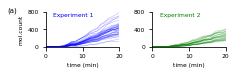

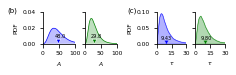

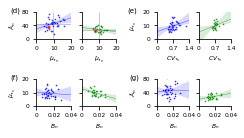

In [5]:
M=1000000
fontsiz=6
T=20

f,axes = plt.subplots(1,2,figsize=(3.5,1.15))
pd_subsampled_x1=pd.read_csv("YFP1.csv")
x1= pd_subsampled_x1.values
pd_subsampled_x2=pd.read_csv("YFP2.csv")
x2= pd_subsampled_x2.values
for i in range(2):
    axes[i].spines['right'].set_color('none')
    axes[i].spines['top'].set_color('none')
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    axes[i].set_xlim([0,T])
    axes[i].set_ylim([0,800])
    axes[i].set_xticks(np.linspace(0,T,3))
    axes[i].set_yticks(np.linspace(0,800,3))
axes[0].plot(x1[:T+1,:],alpha=0.3,c='b',linewidth=0.5)
axes[1].plot(x2[:T+1,:],alpha=0.3,c='g',linewidth=0.5)
for i in range(2):
    axes[i].set_xlabel('time (min)',fontsize=fontsiz)
axes[0].set_ylabel('mol.count',fontsize=fontsiz)
axes[0].text(2,700,'Experiment 1',color='b',fontsize=fontsiz)
axes[1].text(2,700,'Experiment 2',color='g',fontsize=fontsiz)
axes[0].text(-10.5,800,'(a)',fontsize=fontsiz+1)
plt.tight_layout()
f.savefig('fig4_experiment_trajectory.jpg', format='jpg', dpi=500,bbox_inches="tight")

hier1 = loadmat('YFP1.mat',squeeze_me=True)
hier2 = loadmat('YFP2.mat',squeeze_me=True)
f=plt.figure(figsize=(3.5,1.15))
plot_experiment(hier1,hier2,['(b)','(c)'])
f.savefig('fig4_A_delay_distribution.jpg', format='jpg', dpi=500,bbox_inches="tight")

f=plt.figure(figsize=(3.5,2))
plot_experiment_correlation(hier1,hier2)
f.savefig('fig4_experiment_corr.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Supplementary Figures

# Fig S1. Fixed delay box plots

In [ ]:
##############################import data from matlab for fixed delay data############################################   
def boxplot_cells(data1,data2,data3,true,i,j,labels):
    pal = {tag1: "deepskyblue", tag2: "yellow", tag3:"C1"}
    a1=pd.DataFrame(data1/true,columns=[1]).assign(minutes=tag1)
    a2=pd.DataFrame(data2/true,columns=[1]).assign(minutes=tag2)
    a3=pd.DataFrame(data3/true,columns=[1]).assign(minutes=tag3)
    a=pd.concat([a1,a2,a3])
    sns.boxplot(x='minutes',y=1,data=a,orient='v',showfliers=False,palette=pal,order=[tag1,tag2,tag3],width=0.5,ax=axes[i,j])
    axes[i,j].set_ylim([0,2])
    axes[i,j].set_yticks([0,1,2])  
    axes[i,j].set_yticklabels([0,1,2],fontsize=fontsiz)
    if i==0:
        axes[i,j].set_xticks([])
        axes[i,j].set_xticklabels([], size=fontsiz)
    else:
        axes[i,j].set_xticklabels([tag1,tag2,tag3], size=fontsiz)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel(labels,fontsize=fontsiz) 

In [ ]:
hier40 = loadmat('fixed_40.mat',squeeze_me=True)
hier30 = loadmat('fixed_30.mat',squeeze_me=True)
hier20 = loadmat('fixed_20.mat',squeeze_me=True)

a_A=8
b_A=0.23
a_B=9
b_B=625
a_delay=7
b_delay=1

#############boxplot comparisons##############
tag1='20'
tag2='30'
tag3='40'
fontsiz=6
f, axes = plt.subplots(2,2,figsize=(3.5,2))
sns.set_context(rc={"lines.linewidth": 0.5})
boxplot_cells(hier20['aA'],hier30['aA'],hier40['aA'],a_A,0,0,r'Norm. $a_A$')
boxplot_cells(hier20['bA'],hier30['bA'],hier40['bA'],b_A,0,1,r'Norm. $b_A$')
boxplot_cells(hier20['adelay'],hier30['adelay'],hier40['adelay'],a_delay,1,0,r'Norm. $a_{\tau}$')
boxplot_cells(hier20['bdelay'],hier30['bdelay'],hier40['bdelay'],b_delay,1,1,r'Norm. $b_{\tau}$')
for i in range(2):
    for j in range(2):
        axes[i,j].plot([-1,4],[1,1],alpha=0.5,c='k')
plt.suptitle('Number of cells',fontsize=fontsiz,y=0.02)
plt.tight_layout(h_pad=0.3)  
f.savefig('figs1_fixed_vary_cell_compare.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S2 Fnorm VS MDIP

In [ ]:
def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_delay_var = np.zeros(N)
    hier_mean_delay = np.zeros(N)
    
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
        hier_delay_var[i]=np.var(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A, hier_mean_delay, hier_delay_var, hier_delay    

def gen_val_true_distribution(data,a_alpha,b_alpha,a_beta,b_beta,M):
    N=np.shape(data['A'])[1]
    true_alpha=np.random.gamma(a_alpha,1./b_alpha,size=M)
    true_beta=np.random.gamma(a_beta,1./b_beta,size=M)
    true_ind_delay=np.zeros([M,N])
    for i in range(N):
        true_ind_delay[:,i]=np.random.gamma(data['alpha1'][i],1./data['beta1'][i],size=M)
    true_delay=true_ind_delay.flatten() 
    return true_delay

def plot_individual(data1,data2,data3,typ): 
    A1, mean_delay1, delay_var1, delay1 = gen_val_distributed(data1,M)
    A2, mean_delay2, delay_var2, delay2 = gen_val_distributed(data2,M)
    A3, mean_delay3, delay_var3, delay3 = gen_val_distributed(data3,M)

    if typ=='mdip':
        col='crimson'    
    elif typ == 'fnorm':
        col='steelblue'
    
    axes[0,0].scatter(np.mean(data1['A'],0)/data1['A1'],mean_delay1/(data1['alpha1']/data1['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[0,1].scatter(np.mean(data2['A'],0)/data2['A1'],mean_delay2/(data2['alpha1']/data2['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[0,2].scatter(np.mean(data3['A'],0)/data3['A1'],mean_delay3/(data3['alpha1']/data3['beta1']),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
       
    axes[1,0].scatter(mean_delay1/(data1['alpha1']/data1['beta1']),delay_var1/(data1['alpha1']/data1['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[1,1].scatter(mean_delay2/(data2['alpha1']/data2['beta1']),delay_var2/(data2['alpha1']/data2['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[1,2].scatter(mean_delay3/(data3['alpha1']/data3['beta1']),delay_var3/(data3['alpha1']/data3['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)

    sns.kdeplot(A1,shade=True,ax=axes[2,0],linewidth=0.5,color=col)
    sns.kdeplot(A2,shade=True,ax=axes[2,1],linewidth=0.5,color=col)
    sns.kdeplot(A3,shade=True,ax=axes[2,2],linewidth=0.5,color=col) 
    sns.scatterplot([np.mean(A1)],[0.003],marker='v',s=20,ax=axes[2,0],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(A2)],[0.003],marker='v',s=20,ax=axes[2,1],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(A3)],[0.003],marker='v',s=20,ax=axes[2,2],linewidth=0.5,color=col)  
    
    sns.kdeplot(delay1,shade=True,ax=axes[3,0],linewidth=0.5,color=col)
    sns.kdeplot(delay2,shade=True,ax=axes[3,1],linewidth=0.5,color=col)
    if typ=='mdip':
        model = KernelDensity(kernel='gaussian', bandwidth=0.4)
        model.fit(delay3[:20000][:,None])
        x_test=np.linspace(-1,20,10000)
        log_dens = model.score_samples(x_test[:,None])
        axes[3,2].plot(x_test,np.exp(log_dens),c=col,linewidth=0.4)
        axes[3,2].fill(x_test, np.exp(log_dens), c=col,alpha=0.2)
    else:
        sns.kdeplot(delay3,shade=True,ax=axes[3,2],linewidth=0.5,color=col) 
    sns.scatterplot([np.mean(delay1)],[0.03],marker='v',s=20,ax=axes[3,0],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(delay2)],[0.03],marker='v',s=20,ax=axes[3,1],linewidth=0.5,color=col)
    sns.scatterplot([np.mean(delay3)],[0.03],marker='v',s=20,ax=axes[3,2],linewidth=0.5,color=col)
    
    axes[0,0].set_ylabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axes[1,0].set_ylabel(r'Norm. $\hat{\sigma}^2_{\tau_n}$',fontsize=fontsiz)
    axes[2,0].set_ylabel('PDF',fontsize=fontsiz)
    axes[3,0].set_ylabel('PDF',fontsize=fontsiz)
    
    
    for i in range(3):
        axes[0,i].set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
        axes[1,i].set_xlabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
        axes[2,i].set_xlabel(r'$A$',fontsize=fontsiz)
        axes[3,i].set_xlabel(r'$\tau$',fontsize=fontsiz)
        

In [ ]:
mdip1 = loadmat('mdip_var35.mat',squeeze_me=True)
mdip2 = loadmat('mdip_var7.mat',squeeze_me=True)
mdip3 = loadmat('mdip_var14.mat',squeeze_me=True)

fnorm1 = loadmat('fnorm_var35.mat',squeeze_me=True)
fnorm2 = loadmat('fnorm_var7.mat',squeeze_me=True)
fnorm3 = loadmat('fnorm_var14.mat',squeeze_me=True)

N=np.shape(mdip1['A'])[1]
M=1000000
    
a_A=8
b_A=0.23
a_alpha=[84, 63, 35] 
b_alpha=[6, 9, 10]
a_beta=[10, 10, 10]
b_beta=[5, 10, 20]


fontsiz=6

f, axes = plt.subplots(1,3,figsize=(3.5,0.1))
axes[0].text(0.5,0.5,'Folded Normal',color='steelblue',fontsize=fontsiz)
axes[1].text(0.5,0.5,'MDIP',color='crimson',fontsize=fontsiz)
axes[2].text(0.5,0.5,'True',color='C2',fontsize=fontsiz)
for i in range(3):
    axes[i].axis('off')
f.savefig('figs2_fnorm.jpg', format='jpg', dpi=500,bbox_inches="tight")

f, axes = plt.subplots(4,3,figsize=(3.5,4.4))
true_A=np.random.gamma(a_A,1./b_A,size=M)
titles=[r'$\sigma_{\tau_n}^2\approx 3.5$',r'$\sigma_{\tau_n}^2\approx 7$',r'$\sigma_{\tau_n}^2\approx 14$']
for j in range(3):
    sns.kdeplot(true_A,shade=True,ax=axes[2,j],linewidth=0.5,color='C2')
    sns.scatterplot([np.mean(true_A)],[-0.002],marker='^',s=20,ax=axes[2,j],linewidth=0.5,color='C2',clip_on=False)
    for i in range(2):
        axes[i,j].set_xlim([0,2])
        axes[i,j].hlines(1,0,2,alpha=0.3,linewidth=0.5)
        axes[i,j].vlines(1,0,6,alpha=0.3,linewidth=0.5)
    axes[0,j].set_ylim([0,2])
    axes[1,j].set_ylim([0,6])    
    axes[2,j].set_xlim([0,90])
    axes[2,j].set_ylim([0,0.04])
    axes[3,j].set_xlim([0,20])
    axes[3,j].set_ylim([0,0.4])
    for i in range(4):
        axes[i,j].set_title(titles[j],fontsize=fontsiz,y=0.95)
        axes[i,j].spines['right'].set_color('none')
        axes[i,j].spines['top'].set_color('none')
        axes[i,j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
        if j>0:
            axes[i,j].set_yticklabels([])
axes[0,0].text(-1.2,2,'(a)',fontsize=fontsiz+1)
axes[0,1].text(-0.6,2,'(b)',fontsize=fontsiz+1)
axes[0,2].text(-0.6,2,'(c)',fontsize=fontsiz+1)
axes[1,0].text(-1.2,6,'(d)',fontsize=fontsiz+1)
axes[1,1].text(-0.6,6,'(e)',fontsize=fontsiz+1)
axes[1,2].text(-0.6,6,'(f)',fontsize=fontsiz+1)
axes[2,0].text(-57,0.04,'(g)',fontsize=fontsiz+1)
axes[2,1].text(-27,0.04,'(h)',fontsize=fontsiz+1)
axes[2,2].text(-27,0.04,'(i)',fontsize=fontsiz+1)
axes[3,0].text(-12.1,0.4,'(j)',fontsize=fontsiz+1)
axes[3,1].text(-5.8,0.4,'(k)',fontsize=fontsiz+1)
axes[3,2].text(-5.8,0.4,'(l)',fontsize=fontsiz+1)

plot_individual(mdip1,mdip2,mdip3,'mdip')
plot_individual(fnorm1,fnorm2,fnorm3,'fnorm')
true_delay1=gen_val_true_distribution(mdip1,a_alpha[0],b_alpha[0],a_beta[0],b_beta[0],M)
true_delay2=gen_val_true_distribution(mdip2,a_alpha[1],b_alpha[1],a_beta[1],b_beta[1],M)
true_delay3=gen_val_true_distribution(mdip3,a_alpha[2],b_alpha[2],a_beta[2],b_beta[2],M)
sns.kdeplot(true_delay1,shade=True,ax=axes[3,0],linewidth=0.5,color='C2')
sns.kdeplot(true_delay2,shade=True,ax=axes[3,1],linewidth=0.5,color='C2')
sns.kdeplot(true_delay3,shade=True,ax=axes[3,2],linewidth=0.5,color='C2')
sns.scatterplot([np.mean(true_delay1)],[-0.02],marker='^',s=20,ax=axes[3,0],linewidth=0.5,color='C2',clip_on=False)    
sns.scatterplot([np.mean(true_delay2)],[-0.02],marker='^',s=20,ax=axes[3,1],linewidth=0.5,color='C2',clip_on=False) 
sns.scatterplot([np.mean(true_delay3)],[-0.02],marker='^',s=20,ax=axes[3,2],linewidth=0.5,color='C2',clip_on=False)

plt.tight_layout(w_pad=0,h_pad=0.1)
f.savefig('figs2_fnorm_compare.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S3. Dist delay model in fixed delay data

In [ ]:
def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #alpha
    a1=hier['aalpha'][np.random.randint(L,size=M)]
    b1=hier['balpha'][np.random.randint(L,size=M)]
    hier_alpha=np.random.gamma(a1,np.divide(1,b1))
    #beta
    a2=hier['abeta'][np.random.randint(L,size=M)]
    b2=hier['bbeta'][np.random.randint(L,size=M)]
    hier_beta=np.random.gamma(a2,np.divide(1,b2))    
    #A
    a3=hier['aA'][np.random.randint(L,size=M)]
    b3=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a3,np.divide(1,b3))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    hier_var_delay = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_var_delay[i]=np.var(hier_ind_delay[:,i])
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A,hier_alpha, hier_beta, hier_mean_delay, hier_delay, hier_var_delay    

In [ ]:
data = loadmat('mdip_var0.mat',squeeze_me=True)
N=np.shape(data['A'])[1]
M=1000000
a_delay=7
b_delay=1
hier_A,hier_alpha, hier_beta, hier_mean_delay, hier_delay, hier_var_delay   = gen_val_distributed(data,M)

fontsiz=6
f, axes = plt.subplots(1,4,figsize=(6,1.3))
axes[0].scatter(np.mean(data['A'],0)/data['A1'],hier_mean_delay/data['delay1'],c='C1',s=fontsiz-4,alpha=0.6,linewidth=0)
axes[0].hlines(1,0,2,alpha=0.3,linewidth=0.5)
axes[0].vlines(1,0,2,alpha=0.3,linewidth=0.5)

sns.barplot(np.arange(1,N+1),hier_var_delay,ax=axes[1],color='C1')
axes[1].hlines(np.mean(hier_var_delay),0,40,alpha=0.3,linewidth=0.5)
axes[1].text(35,np.mean(hier_var_delay)+1,'%1.1f' %(np.mean(hier_var_delay)),fontsize=fontsiz-1)

sns.kdeplot(hier_A, shade=True,ax=axes[2],color='C1',linewidth=0.7) 
sns.kdeplot(np.random.gamma(8,1/0.23,size=M), shade=True,ax=axes[2],color='C2',linewidth=0.7) 
axes[2].text(55,0.035,'Inferred',color='C1',fontsize=fontsiz)
axes[2].text(55,0.025,'True',color='C2',fontsize=fontsiz)
sns.scatterplot([np.mean(hier_A)],[0.003],marker='v',s=20,ax=axes[2],linewidth=0.5,color='C1')    
sns.scatterplot([8/0.23],[0.003],marker='v',s=20,ax=axes[2],linewidth=0.5,color='C2') 

sns.kdeplot(hier_delay, shade=True,ax=axes[3],color='C1',linewidth=0.7) 
sns.kdeplot(np.random.gamma(a_delay,1/b_delay,size=M), shade=True,ax=axes[3],color='C2',linewidth=0.7) 
sns.scatterplot([np.mean(hier_delay)],[0.02],marker='v',s=20,ax=axes[3],linewidth=0.5,color='C1')    
sns.scatterplot([a_delay/b_delay],[0.02],marker='v',s=20,ax=axes[3],linewidth=0.5,color='C2') 

for i in range(4):
    axes[i].spines['right'].set_color('none')
    axes[i].spines['top'].set_color('none')
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
axes[0].set_xlim([0.8,1.2])
axes[0].set_ylim([0.8,1.2])
axes[1].set_xticks([0,20,39])
axes[1].set_xticklabels([1,20,40])
axes[1].set_xlim([0,39])
axes[1].set_ylim([0,20])
axes[2].set_xlim([0,100])
axes[2].set_ylim([0,0.04])
axes[3].set_xlim([0,20])
axes[3].set_ylim([0,0.2])

axes[0].text(0.6,1.2,'(a)',fontsize=fontsiz+1)
axes[1].text(-20,20,'(b)',fontsize=fontsiz+1)
axes[2].text(-53,0.04,'(c)',fontsize=fontsiz+1)
axes[3].text(-9.5,0.2,'(d)',fontsize=fontsiz+1)

xlabels=[r'Norm. $\hat{A}_n$',r'Cell $n$',r'$A$',r'$\tau$']
ylabels=[r'Norm. $\hat{\mu}_{\tau_n}$',r'$\hat{\sigma}^2_{\tau_n}$','PDF','PDF']
for i in range(4):
    axes[i].set_xlabel(xlabels[i],fontsize=fontsiz)
    axes[i].set_ylabel(ylabels[i],fontsize=fontsiz)
plt.tight_layout(w_pad=0)
f.savefig('figs3_dist_model_fixed_data.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S4: Additional simulation - Hier vs Nonhier

In [ ]:
def gen_val_nonhierarchical(nonhier,M):
    size=np.shape(nonhier['A'])
    N=size[1]
    L=size[0]    
    nonhier_A=nonhier['A'][:,0:N].flatten()
    nonhier_alpha=nonhier['alpha'][:,0:N].flatten()
    nonhier_beta=nonhier['beta'][:,0:N].flatten()
    #delay
    nonhier_ind_delay = np.zeros([M,N])
    nonhier_mean_delay = np.zeros(N)
    nonhier_delay_std = np.zeros(N)
    for i in range(N):
        a4=nonhier['alpha'][np.random.randint(L,size=M),i]
        b4=nonhier['beta'][np.random.randint(L,size=M),i]
        nonhier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        nonhier_mean_delay[i]=np.mean(nonhier_ind_delay[:,i])
        nonhier_delay_std[i]=np.std(nonhier_ind_delay[:,i])       
    nonhier_delay=nonhier_ind_delay.flatten()
    return nonhier_A, nonhier_alpha, nonhier_beta, nonhier_ind_delay, nonhier_mean_delay, nonhier_delay,nonhier_delay_std  

def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #alpha
    a2=hier['aalpha'][np.random.randint(L,size=M)]
    b2=hier['balpha'][np.random.randint(L,size=M)]
    hier_alpha=np.random.gamma(a2,np.divide(1,b2))
    #beta
    a3=hier['abeta'][np.random.randint(L,size=M)]
    b3=hier['bbeta'][np.random.randint(L,size=M)]
    hier_beta=np.random.gamma(a3,np.divide(1,b3))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    hier_delay_std = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])      
        hier_delay_std[i]=np.std(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A, hier_alpha, hier_beta, hier_ind_delay, hier_mean_delay, hier_delay, hier_delay_std   

def gen_val_true_distribution(hier,a_A,b_A,a_alpha,b_alpha,a_beta,b_beta,M,i):

    
    N=np.shape(hier['A'])[1]
    true_A=np.random.gamma(a_A[i],1./b_A[i],size=M)
    true_alpha=np.random.gamma(a_alpha[i],1./b_alpha[i],size=M)
    true_beta=np.random.gamma(a_beta[i],1./b_beta[i],size=M)
    true_ind_delay = np.zeros([M,N])
    for i in range(N):
        true_ind_delay[:,i]=np.random.gamma(hier['alpha1'][i],1./hier['beta1'][i],size=M)
    true_delay=true_ind_delay.flatten() 
    return true_A,true_alpha,true_beta,true_ind_delay,true_delay

def rmoutliers(x,a,b):
    size=len(x)
    x = pd.Series(x)
    x = x[x.between(x.quantile(a), x.quantile(b))]
    return x.values

def fix_format(i):
    if i==0:
        tag=['(a)','(b)','(c)','(d)','(e)']
    else:
        tag=['(f)','(g)','(h)','(i)','(j)']
    for j in range(5):
        axes[j].spines['right'].set_color('none')
        axes[j].spines['top'].set_color('none')
        axes[j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    axes[0].set_ylabel('Mol. count',fontsize=fontsiz)
    axes[0].set_xlim([0,40])
    axes[0].set_ylim([0,1500])
    axes[0].set_yticks([0,750,1500])
    axes[1].set_ylabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axes[1].set_xlim([0.5,1.5])
    axes[1].set_ylim([0.5,2])
    axes[1].set_yticks([0.5,1,1.5,2])
    axes[1].hlines(1,0,2,alpha=0.3,linewidth=0.5)
    axes[1].vlines(1,0,2,alpha=0.3,linewidth=0.5)
    axes[2].set_ylabel(r'Norm. $\hat{\sigma}^2_{\tau_n}$',fontsize=fontsiz)
    axes[2].set_xlim([0,2])
    axes[2].set_ylim([0,10])
    axes[2].set_yticks([0,5,10])
    axes[2].hlines(1,0,10,alpha=0.3,linewidth=0.5)
    axes[2].vlines(1,0,10,alpha=0.3,linewidth=0.5)
    axes[3].set_ylabel('PDF',fontsize=fontsiz)
    axes[3].set_xlim([0,100])
    axes[3].set_ylim([0,0.08])
    axes[3].set_yticks([0,0.04,0.08])
    axes[4].set_ylabel('PDF',fontsize=fontsiz)
    axes[4].set_xlim([0,30])
    axes[4].set_xticks([0,15,30])
    axes[4].set_ylim([0,0.2])
    axes[4].set_yticks([0,0.1,0.2])
    axes[0].set_xlabel('Time (min.)',fontsize=fontsiz)
    axes[1].set_xlabel(r'Norm. $\hat{A}_n$',fontsize=fontsiz)
    axes[2].set_xlabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    axes[3].set_xlabel(r'$A$',fontsize=fontsiz)    
    axes[4].set_xlabel(r'$\tau$',fontsize=fontsiz)    
    plt.tight_layout(w_pad=0.5)
    axes[0].text(-32,1500,tag[0],fontsize=fontsiz+1)
    axes[1].text(-0.2,2,tag[1],fontsize=fontsiz+1)
    axes[2].text(-1.4,10,tag[2],fontsize=fontsiz+1)
    axes[3].text(-75,0.08,tag[3],fontsize=fontsiz+1)
    axes[4].text(-20,0.2,tag[4],fontsize=fontsiz+1)

In [ ]:
nonhier2 = loadmat('nonhier2',squeeze_me=True)
nonhier3 = loadmat('nonhier3',squeeze_me=True)
hier2 = loadmat('mdip2.mat',squeeze_me=True) 
hier3 = loadmat('mdip3.mat',squeeze_me=True) 
pd_subsampled_x2=pd.read_csv("mdip2.csv")
pd_subsampled_x3=pd.read_csv("mdip3.csv")
x2= pd_subsampled_x2.values
x3= pd_subsampled_x3.values

T=40
M=1000000
a_A=[6, 6]
b_A=[0.25, 0.2]
a_alpha=[84, 35]
b_alpha=[6, 10]
a_beta=[10, 10]
b_beta=[5, 20]
col=['C1','slategrey']

hier_A2, hier_alpha2, hier_beta2, hier_ind_delay2, hier_mean_delay2, hier_delay2,hier_delay_std2  = gen_val_distributed(hier2,M)
true_A2,true_alpha2,true_beta2,true_ind_delay2,true_delay2 = gen_val_true_distribution(hier2,a_A,b_A,a_alpha,b_alpha,a_beta,b_beta,M,0)  #remove this later
nonhier_A2, nonhier_alpha2, nonhier_beta2, nonhier_ind_delay2, nonhier_mean_delay2, nonhier_delay2,nonhier_delay_std2 = gen_val_nonhierarchical(nonhier2,M)

hier_A3, hier_alpha3, hier_beta3, hier_ind_delay3, hier_mean_delay3, hier_delay3,hier_delay_std3  = gen_val_distributed(hier3,M)
true_A3,true_alpha3,true_beta3,true_ind_delay3,true_delay3 = gen_val_true_distribution(hier3,a_A,b_A,a_alpha,b_alpha,a_beta,b_beta,M,1)  #remove this later
nonhier_A3, nonhier_alpha3, nonhier_beta3, nonhier_ind_delay3, nonhier_mean_delay3, nonhier_delay3,nonhier_delay_std3 = gen_val_nonhierarchical(nonhier3,M)

fontsiz=6
f, axes = plt.subplots(1,3,figsize=(6,0.1))
axes[0].text(0.5,0.5,'Hierarchical',color=col[0],fontsize=fontsiz)
axes[1].text(0.5,0.5,'Non-hierarchical',color=col[1],fontsize=fontsiz)
axes[2].text(0.5,0.5,'True Density',color='C2',fontsize=fontsiz)
for i in range(3):
    axes[i].axis('off')
f.savefig('figs4_heading.jpg', format='jpg', dpi=500,bbox_inches="tight")

f,axes=plt.subplots(1,5,figsize=(6,1.3))
axes[0].plot(x2,alpha=0.3,c='mediumseagreen',linewidth=0.5)
axes[1].scatter(np.mean(hier2['A'],0)/hier2['A1'],hier_mean_delay2/(hier2['alpha1']/hier2['beta1']),c=col[0],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[1].scatter(np.mean(nonhier2['A'],0)/nonhier2['A1'],nonhier_mean_delay2/(nonhier2['alpha1']/nonhier2['beta1']),c=col[1],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[2].scatter(hier_mean_delay2/(hier2['alpha1']/hier2['beta1']),(hier_delay_std2**2)/(hier2['alpha1']/(hier2['beta1'])**2),c=col[0],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[2].scatter(nonhier_mean_delay2/(nonhier2['alpha1']/nonhier2['beta1']),(nonhier_delay_std2**2)/(nonhier2['alpha1']/(nonhier2['beta1'])**2),c=col[1],s=fontsiz-4,alpha=0.6,linewidth=0)
sns.kdeplot(hier_A2, shade=True,ax=axes[3],color=col[0],linewidth=0.7) 
sns.kdeplot(nonhier_A2, shade=True,ax=axes[3],color=col[1],linewidth=0.7) 
sns.kdeplot(true_A2, shade=True,ax=axes[3],color='C2',linewidth=0.7)
sns.scatterplot([np.mean(hier_A2)],[0.007],marker='v',s=20,ax=axes[3],linewidth=0.5,color=col[0])    
sns.scatterplot([np.mean(nonhier_A2)],[0.007],marker='v',s=20,ax=axes[3],linewidth=0.5,color=col[1])    
sns.scatterplot([np.mean(true_A2)],[-0.005],marker='^',s=20,ax=axes[3],linewidth=0.5,color='C2',clip_on=False)    
model = KernelDensity(kernel='gaussian', bandwidth=0.5)
model.fit(hier_delay2[:50000,None])
x_test=np.linspace(-30,30,1000)
log_dens = model.score_samples(x_test[:,None])
axes[4].plot(x_test,np.exp(log_dens),c=col[0],linewidth=0.4)
axes[4].fill(x_test, np.exp(log_dens), c=col[0],alpha=0.3)
model = KernelDensity(kernel='gaussian', bandwidth=0.5)
model.fit(nonhier_delay2[:50000,None])
x_test=np.linspace(-30,30,1000)
log_dens = model.score_samples(x_test[:,None])
axes[4].plot(x_test,np.exp(log_dens),c=col[1],linewidth=0.4)
axes[4].fill(x_test, np.exp(log_dens), c=col[1],alpha=0.3)
sns.kdeplot(true_delay2, shade=True,ax=axes[4],color='C2',linewidth=0.7)
sns.scatterplot([np.mean(hier_delay2)],[0.02],marker='v',s=20,ax=axes[4],linewidth=0.5,color=col[0])    
sns.scatterplot([np.mean(nonhier_delay2)],[0.02],marker='v',s=20,ax=axes[4],linewidth=0.5,color=col[1])    
sns.scatterplot([np.mean(true_delay2)],[-0.01],marker='^',s=20,ax=axes[4],linewidth=0.5,color='C2',clip_on=False)  
fix_format(0)
plt.suptitle('Inference using DATA 1',fontsize=fontsiz)
f.savefig('figs4_hier_vs_nonhier_A.jpg', format='jpg', dpi=500,bbox_inches="tight")

f,axes=plt.subplots(1,5,figsize=(6,1.3))
axes[0].plot(x3,alpha=0.3,c='mediumseagreen',linewidth=0.5)
axes[1].scatter(np.mean(hier3['A'],0)/hier3['A1'],hier_mean_delay3/(hier3['alpha1']/hier3['beta1']),c=col[0],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[1].scatter(np.mean(nonhier3['A'],0)/nonhier3['A1'],nonhier_mean_delay3/(nonhier3['alpha1']/nonhier3['beta1']),c=col[1],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[2].scatter(hier_mean_delay3/(hier3['alpha1']/hier3['beta1']),(hier_delay_std3**2)/(hier3['alpha1']/(hier3['beta1'])**2),c=col[0],s=fontsiz-4,alpha=0.6,linewidth=0)
axes[2].scatter(nonhier_mean_delay3/(nonhier3['alpha1']/nonhier3['beta1']),(nonhier_delay_std3**2)/(nonhier3['alpha1']/(nonhier3['beta1'])**2),c=col[1],s=fontsiz-4,alpha=0.6,linewidth=0)
sns.kdeplot(hier_A3, shade=True,ax=axes[3],color=col[0],linewidth=0.7) 
sns.kdeplot(nonhier_A3, shade=True,ax=axes[3],color=col[1],linewidth=0.7) 
sns.kdeplot(true_A3, shade=True,ax=axes[3],color='C2',linewidth=0.7)
sns.scatterplot([np.mean(hier_A3)],[0.007],marker='v',s=20,ax=axes[3],linewidth=0.5,color=col[0])    
sns.scatterplot([np.mean(nonhier_A3)],[0.007],marker='v',s=20,ax=axes[3],linewidth=0.5,color=col[1])    
sns.scatterplot([np.mean(true_A3)],[-0.005],marker='^',s=20,ax=axes[3],linewidth=0.5,color='C2',clip_on=False)    
model = KernelDensity(kernel='gaussian', bandwidth=0.5)
model.fit(hier_delay3[:50000,None])
x_test=np.linspace(-30,30,1000)
log_dens = model.score_samples(x_test[:,None])
axes[4].plot(x_test,np.exp(log_dens),c=col[0],linewidth=0.4)
axes[4].fill(x_test, np.exp(log_dens), c=col[0],alpha=0.3)
model = KernelDensity(kernel='gaussian', bandwidth=0.5)
model.fit(nonhier_delay3[:50000,None])
x_test=np.linspace(-30,30,1000)
log_dens = model.score_samples(x_test[:,None])
axes[4].plot(x_test,np.exp(log_dens),c=col[1],linewidth=0.4)
axes[4].fill(x_test, np.exp(log_dens), c=col[1],alpha=0.3)
sns.kdeplot(true_delay3, shade=True,ax=axes[4],color='C2',linewidth=0.7)
sns.scatterplot([np.mean(hier_delay3)],[0.02],marker='v',s=20,ax=axes[4],linewidth=0.5,color=col[0])    
sns.scatterplot([np.mean(nonhier_delay3)],[0.02],marker='v',s=20,ax=axes[4],linewidth=0.5,color=col[1])    
sns.scatterplot([np.mean(true_delay3)],[-0.01],marker='^',s=20,ax=axes[4],linewidth=0.5,color='C2',clip_on=False)  
fix_format(1)
plt.suptitle('Inference using DATA 2',fontsize=fontsiz)
f.savefig('figs4_hier_vs_nonhier_B.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S5. Variances, alpha, beta of distributed model with uninformative

In [ ]:
def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #alpha
    a1=hier['aalpha'][np.random.randint(L,size=M)]
    b1=hier['balpha'][np.random.randint(L,size=M)]
    hier_alpha=np.random.gamma(a1,np.divide(1,b1))
    #beta
    a2=hier['abeta'][np.random.randint(L,size=M)]
    b2=hier['bbeta'][np.random.randint(L,size=M)]
    hier_beta=np.random.gamma(a2,np.divide(1,b2))    
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    hier_var_delay = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_var_delay[i]=np.var(hier_ind_delay[:,i])
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_alpha, hier_beta, hier_mean_delay, hier_delay, hier_var_delay    

def plot_individual(data1,data2,data3,typ): 
    if typ=='mdip':
        alpha1, beta1, mean_delay1, delay1, var_delay1 = gen_val_distributed(data1,M)
        alpha2, beta2, mean_delay2, delay2, var_delay2 = gen_val_distributed(data2,M)
        alpha3, beta3, mean_delay3, delay3, var_delay3 = gen_val_distributed(data3,M)
        col='crimson'    
    else:
        alpha1, beta1, mean_delay1, delay1, var_delay1 = gen_val_distributed(data1,M)
        alpha2, beta2, mean_delay2, delay2, var_delay2 = gen_val_distributed(data2,M)
        alpha3, beta3, mean_delay3, delay3, var_delay3 = gen_val_distributed(data3,M)
        col='steelblue'
  
    a_A=8
    b_A=0.23
    a_alpha=[84, 63, 35] 
    b_alpha=[6, 9, 10]
    a_beta=[10, 10, 10]
    b_beta=[5, 10, 20]
    
    axes[0,0].scatter(np.mean(data1['alpha'],0)/data1['alpha1'],np.mean(data1['beta'],0)/data1['beta1'],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[0,1].scatter(np.mean(data2['alpha'],0)/data2['alpha1'],np.mean(data2['beta'],0)/data2['beta1'],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[0,2].scatter(np.mean(data3['alpha'],0)/data3['alpha1'],np.mean(data3['beta'],0)/data3['beta1'],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    
    p=6
    axes[1,0].scatter(data1['alpha'][:,p]/data1['alpha1'][p],data1['beta'][:,p]/data1['beta1'][p],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[1,1].scatter(data2['alpha'][:,p]/data2['alpha1'][p],data2['beta'][:,p]/data2['beta1'][p],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[1,2].scatter(data3['alpha'][:,p]/data3['alpha1'][p],data3['beta'][:,p]/data3['beta1'][p],c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    
    
    axes[2,0].scatter(mean_delay1/(data1['alpha1']/data1['beta1']),var_delay1/(data1['alpha1']/data1['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[2,1].scatter(mean_delay2/(data2['alpha1']/data2['beta1']),var_delay2/(data2['alpha1']/data2['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
    axes[2,2].scatter(mean_delay3/(data3['alpha1']/data3['beta1']),var_delay3/(data3['alpha1']/data3['beta1']**2),c=col,s=fontsiz-4,alpha=0.6,linewidth=0)
        

In [ ]:
mdip1 = loadmat('mdip_var35.mat',squeeze_me=True)
mdip2 = loadmat('mdip_var7.mat',squeeze_me=True)
mdip3 = loadmat('mdip_var14.mat',squeeze_me=True)

ratio1 = loadmat('rational_var35.mat',squeeze_me=True)
ratio2 = loadmat('rational_var7.mat',squeeze_me=True)
ratio3 = loadmat('rational_var14.mat',squeeze_me=True)

N=np.shape(mdip1['A'])[1]
M=1000000
    
fontsiz=6
f, axes = plt.subplots(1,4,figsize=(3.5,0.1))
axes[1].text(0.5,0.5,'Rational',color='steelblue',fontsize=fontsiz,ha='center', va='center')
axes[2].text(0.5,0.5,'MDIP',color='crimson',fontsize=fontsiz,ha='center', va='center')
for i in range(4):
    axes[i].axis('off')
f.savefig('figs5_heading.jpg', format='jpg', dpi=500,bbox_inches="tight")

f, axes= plt.subplots(3,3,figsize=(3.5,3.5))
plot_individual(mdip1,mdip2,mdip3,'mdip')
plot_individual(ratio1,ratio2,ratio3,'ratio')
titles=[r'$\sigma_{\tau_n}^2\approx 3.5$',r'$\sigma_{\tau_n}^2\approx 7$',r'$\sigma_{\tau_n}^2\approx 14$']
for j in range(3):
    axes[0,j].set_xlim([0,2])
    axes[0,j].set_ylim([0,2])
    axes[0,j].set_yticks([0,1,2])
    axes[1,j].set_ylim([0.1,10])
    axes[1,j].set_xlim([0.1,10])
    axes[1,j].set_yscale('log')
    axes[1,j].set_xscale('log')
    axes[1,j].minorticks_off()
    axes[2,j].set_xlim([0,2])
    axes[2,j].set_ylim([0,6])
    axes[2,j].set_yticks([0,3,6])
    axes[0,j].set_xlabel(r'Norm. $\hat{\alpha}_n$',fontsize=fontsiz)
    axes[1,j].set_xlabel(r'Norm. $\alpha_7$',fontsize=fontsiz)
    axes[2,j].set_xlabel(r'Norm. $\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
    for i in range(3):
        axes[i,j].set_title(titles[j],fontsize=fontsiz,y=0.95)
        axes[i,j].spines['right'].set_color('none')
        axes[i,j].spines['top'].set_color('none')
        axes[i,j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
        axes[i,j].hlines(1,0,10,alpha=0.3,linewidth=0.5)
        axes[i,j].vlines(1,0,10,alpha=0.3,linewidth=0.5)
    
        if j>0:
            axes[i,j].set_yticklabels([])
axes[0,0].set_ylabel(r'Norm. $\hat{\beta}_n$',fontsize=fontsiz)
axes[1,0].set_ylabel(r'Norm. $\beta_7$',fontsize=fontsiz)
axes[2,0].set_ylabel(r'Norm. $\hat{\sigma}^2_{\tau_n}$',fontsize=fontsiz)
plt.tight_layout(h_pad=0.3)
axes[0,0].text(-1.4,2,'(a)',fontsize=fontsiz+1)
axes[0,1].text(-0.75,2,'(b)',fontsize=fontsiz+1)
axes[0,2].text(-0.75,2,'(c)',fontsize=fontsiz+1)
axes[1,0].text(0.004,10,'(d)',fontsize=fontsiz+1)
axes[1,1].text(0.02,10,'(e)',fontsize=fontsiz+1)
axes[1,2].text(0.02,10,'(f)',fontsize=fontsiz+1)
axes[2,0].text(-1.4,6,'(g)',fontsize=fontsiz+1)
axes[2,1].text(-0.75,6,'(h)',fontsize=fontsiz+1)
axes[2,2].text(-0.75,6,'(i)',fontsize=fontsiz+1)
f.savefig('figs5_alpha_vs_beta.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S6: Pooling vs Hier

In [ ]:
def gen_val_distributed(hier,M):
    size=np.shape(hier['A'])
    N=size[1]
    L=size[0]    
    #A
    a1=hier['aA'][np.random.randint(L,size=M)]
    b1=hier['bA'][np.random.randint(L,size=M)]
    hier_A=np.random.gamma(a1,np.divide(1,b1))
    #alpha
    a2=hier['aalpha'][np.random.randint(L,size=M)]
    b2=hier['balpha'][np.random.randint(L,size=M)]
    hier_alpha=np.random.gamma(a2,np.divide(1,b2))
    #beta
    a3=hier['abeta'][np.random.randint(L,size=M)]
    b3=hier['bbeta'][np.random.randint(L,size=M)]
    hier_beta=np.random.gamma(a3,np.divide(1,b3))
    #delay
    hier_ind_delay = np.zeros([M,N])
    hier_mean_delay = np.zeros(N)
    hier_delay_std = np.zeros(N)
    for i in range(N):
        a4=hier['alpha'][np.random.randint(L,size=M),i]
        b4=hier['beta'][np.random.randint(L,size=M),i]
        hier_ind_delay[:,i]=np.random.gamma(a4,np.divide(1,b4))
        hier_mean_delay[i]=np.mean(hier_ind_delay[:,i])
        hier_delay_std[i]=np.std(hier_ind_delay[:,i])
    hier_delay=hier_ind_delay.flatten()
    return hier_A, hier_alpha, hier_beta, hier_ind_delay, hier_mean_delay, hier_delay,hier_delay_std    

def gen_val_pooled(pooled,M):
    L=len(pooled['alpha'])
    a=pooled['alpha'][np.random.randint(L,size=M)]
    b=pooled['beta'][np.random.randint(L,size=M)]
    pooled_delay=np.random.gamma(a,np.divide(1,b))
    pooled_mean_delay=np.mean(pooled_delay)
    pooled_delay_std=np.std(pooled_delay)
    return pooled_delay, pooled_mean_delay, pooled_delay_std

In [ ]:
mdip_data1 = loadmat('mdip_20_data1.mat',squeeze_me=True)
pooled_data1 = loadmat('pooled_20_data1.mat',squeeze_me=True)
mdip_data2 = loadmat('mdip_20_data2.mat',squeeze_me=True)
pooled_data2 = loadmat('pooled_20_data2.mat',squeeze_me=True)
mdip_data3 = loadmat('mdip_20_data3.mat',squeeze_me=True)
pooled_data3 = loadmat('pooled_20_data3.mat',squeeze_me=True)

M=1000000
mdip1_A, mdip1_alpha, mdip1_beta, mdip1_ind_delay, mdip1_mean_delay, mdip1_delay, mdip1_delay_std = gen_val_distributed(mdip_data1,M)
pooled1_delay, pooled1_mean_delay, pooled1_delay_std = gen_val_pooled(pooled_data1,M)
mdip2_A, mdip2_alpha, mdip2_beta, mdip2_ind_delay, mdip2_mean_delay, mdip2_delay, mdip2_delay_std = gen_val_distributed(mdip_data2,M)
pooled2_delay, pooled2_mean_delay, pooled2_delay_std = gen_val_pooled(pooled_data2,M)
mdip3_A, mdip3_alpha, mdip3_beta, mdip3_ind_delay, mdip3_mean_delay, mdip3_delay, mdip3_delay_std = gen_val_distributed(mdip_data3,M)
pooled3_delay, pooled3_mean_delay, pooled3_delay_std = gen_val_pooled(pooled_data3,M)

fontsiz=6
f,axes = plt.subplots(1,3,figsize=(3.5,1.3))
axes[0].scatter(np.mean(mdip_data1['A'],0),mdip1_mean_delay,s=fontsiz,alpha=0.5,linewidth=0,c='C0',label='Hier: Indvl')
axes[0].scatter(np.mean(mdip_data1['A']),np.mean(mdip1_mean_delay),s=fontsiz+5,linewidth=0,c='C0', label='Hier: Mean')
axes[0].scatter(np.mean(pooled_data1['A'],0),pooled1_mean_delay,s=fontsiz+5,linewidth=0,c='C3',label='Pooled')
axes[0].set_ylim([0,40])
axes[0].set_xlim([10,80])
axes[0].set_xticks([10,45,80])
axes[0].set_yticks([0,20,40])
axes[0].minorticks_off()
axes[0].vlines(np.mean(mdip_data1['A1'][:20]),0,40,alpha=0.3,linewidth=0.5)
axes[0].hlines(np.mean(mdip_data1['alpha1'][:20]/mdip_data1['beta1'][:20]),10,80,alpha=0.3,linewidth=0.5)
axes[0].set_ylabel(r'$\hat{\mu}_{\tau_n}$',fontsize=fontsiz)
axes[0].set_xlabel(r'$\hat{A}_n$',fontsize=fontsiz)
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)

axes[1].scatter(np.mean(pooled_data2['A'],0),pooled2_mean_delay,s=fontsiz+5,linewidth=0,c='C3',label='Pooled')
axes[1].scatter(np.mean(mdip_data2['A'],0),mdip2_mean_delay,s=fontsiz,alpha=0.5,linewidth=0,c='C0',label='Hier: Indvl')
axes[1].scatter(np.mean(mdip_data2['A']),np.mean(mdip2_mean_delay),s=fontsiz+5,linewidth=0,c='C0', label='Hier: Mean')
axes[1].set_ylim([0,40])
axes[1].set_xlim([10,80])
axes[1].set_xticks([10,45,80])
axes[1].set_yticks([0,20,40])
axes[1].set_yticklabels([])
#axes[1].set_title('Data 2',fontsize=fontsiz)
axes[1].minorticks_off()
axes[1].vlines(np.mean(mdip_data2['A1'][:20]),0,40,alpha=0.3,linewidth=0.5)
axes[1].hlines(np.mean(mdip_data2['alpha1'][:20]/mdip_data2['beta1'][:20]),10,80,alpha=0.3,linewidth=0.5)
axes[1].set_xlabel(r'$\hat{A}_n$',fontsize=fontsiz)
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)

axes[2].scatter(np.mean(pooled_data3['A'],0),pooled3_mean_delay,s=fontsiz+5,linewidth=0,c='C3',label='Pooled')
axes[2].scatter(np.mean(mdip_data3['A'],0),mdip3_mean_delay,s=fontsiz,alpha=0.5,linewidth=0,c='C0',label='Hier: Indvl')
axes[2].scatter(np.mean(mdip_data3['A']),np.mean(mdip3_mean_delay),s=fontsiz+5,linewidth=0,c='C0', label='Hier: Mean')
axes[2].set_ylim([0,40])
axes[2].set_xlim([10,80])
axes[2].set_xticks([10,45,80])
axes[2].set_yticks([0,20,40])
axes[2].set_yticklabels([])
axes[2].minorticks_off()
axes[2].vlines(np.mean(mdip_data3['A1'][:20]),0,40,alpha=0.3,linewidth=0.5)
axes[2].hlines(np.mean(mdip_data3['alpha1'][:20]/mdip_data3['beta1'][:20]),10,80,alpha=0.3,linewidth=0.5)
axes[2].set_xlabel(r'$\hat{A}_n$',fontsize=fontsiz)
axes[2].spines['right'].set_color('none')
axes[2].spines['top'].set_color('none')
axes[2].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
plt.tight_layout(w_pad=1)
axes[0].text(-25,40,'(a)',fontsize=fontsiz+1)
axes[1].text(-7,40,'(b)',fontsize=fontsiz+1)
axes[2].text(-7,40,'(c)',fontsize=fontsiz+1)
handles, labels = axes[0].get_legend_handles_labels()
f.legend(handles, labels, loc='upper center',ncol=3,fontsize=fontsiz,frameon=False)
f.savefig('figs6_hier_vs_pooled.jpg', format='jpg', dpi=500,bbox_inches="tight")

# Fig. S7: YFP Realizations 

In [ ]:
def ssa_dist(A,B,alpha,beta,T):
    nt=15000
    S=np.array([1 ,-1])
    xx=np.zeros(nt+1)           #dummy variable for molecule count 
    t_xx=np.zeros(nt+1)         #dummy variable for reaction time 
    t=t_xx[0]
    y=np.zeros(T+1)
    last=1
    q=[]
    i=0
    while t<T and i<nt:
        a=np.array([A, B*xx[i]] )
        cumsum_a=np.cumsum(a,axis=0)
        a_0=cumsum_a[len(cumsum_a)-1]
        t_wait=(1./a_0)*np.log(1./np.random.uniform(0,1,1))
        t_prop=t+t_wait                                      #next reaction time
        q_check=len(q)
        delay=np.random.gamma(alpha,1.0/beta)
        if q_check == 0:                                     #no pending reaction to be completed
            t=t_prop
            t_xx[i+1]=t
            rand=np.random.uniform(0,1,1)
            u= cumsum_a>=rand*a_0
            if u[0]==True:
                q=np.sort(np.append(q,t+delay))
                xx[i+1]=xx[i]
            else:
                xx[i+1]=xx[i]+S[1]
        else:
            if t_prop<q[0]:
                t=t_prop
                t_xx[i+1]=t
                rand=np.random.uniform(0,1,1)
                u= cumsum_a>=rand*a_0
                if u[0]==True:
                    q=np.sort(np.append(q,t+delay))
                    xx[i+1]=xx[i]
                else:
                    xx[i+1]=xx[i]+S[1]
            else:
                t=q[0]
                t_xx[i+1]=t
                xx[i+1]=xx[i]+S[0]
                q=q[1:]
        if t_xx[i+1]>=last and t_xx[i]<last:
            y[last]=xx[i+1]
            last+=1 
        i+=1    
    return y

def plot_realizations(data,T,obs,rep,row,column,max_y,col,z):
    A=data['A']
    B=data['B']
    alpha=data['alpha']
    beta=data['beta']
    N=np.shape(data['A'])[1]
    for p in range(N):
        hpd_A=pymc3.stats.hpd(A[:,p])
        hpd_alpha=pymc3.stats.hpd(alpha[:,p])
        hpd_beta=pymc3.stats.hpd(beta[:,p])
        Bn=B[p]
        for i in range(row):
            if p<column*(i+1):
                m=i
                break    
        z2=np.zeros(obs+1)

        for i in range(rep):
            An=-1
            while An<hpd_A[0] or An>hpd_A[1]:
                An=np.random.choice(A[:,p])
            alphan=-1
            while alphan<hpd_alpha[0] or alphan>hpd_alpha[1]:
                alphan=np.random.choice(alpha[:,p])
            betan=-1
            while betan<hpd_beta[0] or betan>hpd_beta[1]:
                betan=np.random.choice(beta[:,p])    
            y=ssa_dist(An,Bn,alphan,betan,T)
            z2+=y[:obs+1]
            axes[m,p%column].plot(range(obs+1),y[:obs+1],'b',alpha=0.05,c=col,linewidth=0.5)
        z2*=(1./rep)
        axes[m,p%column].plot(range(obs+1),z2,'b',label='simulated',linewidth=0.75,c=col,alpha=0.7)
        axes[m,p%column].scatter(range(obs+1),z[:obs+1,p],c='r',s=0.5,label='data')
        
    for i in range(row):
        for j in range(column):
            axes[i,j].set_xlim((0,T))
            axes[i,j].set_ylim((0,max_y))
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            axes[i,j].spines['right'].set_color('none')
            axes[i,j].spines['top'].set_color('none')
            axes[i,j].tick_params(axis = 'both', which = 'major', labelsize = fontsiz)
    for j in range(column):
        axes[row-1,j].set_xticks([0,10,T])
    for i in range(row):
        axes[i,0].set_yticks(np.linspace(0,max_y,3))
        

In [ ]:
T=20
obs=20
rep=100
max_y1=1000
max_y2=500

fontsiz=6
YFP1 = loadmat('YFP1.mat',squeeze_me=True)
pd_subsampled_z=pd.read_csv("YFP1.csv")
YFP1_data= pd_subsampled_z.values
row=8
column=5
col='b'
f, axes = plt.subplots(row,column,figsize=(4,row/2))
plot_realizations(YFP1,T,obs,rep,row,column,max_y1,col,YFP1_data)
axes[0,0].text(2,max_y1-100,'data',color='r',fontsize=fontsiz)
axes[0,0].text(2,max_y1-300,'simulated',color=col,fontsize=fontsiz)
plt.tight_layout(h_pad=0.01, w_pad=0) 
plt.suptitle('Experiment 1',fontsize=fontsiz)
f.text(0.5, 0, 'Time (min)', va='center', ha='center', fontsize=fontsiz)
f.text(0, 0.5, 'Molecular count', va='center', ha='center', rotation='vertical', fontsize=fontsiz)
axes[row-1,column-1].axis('off')
f.savefig('figs7_YFP1_trajectories.jpg', format='jpg', dpi=500,bbox_inches="tight")   

YFP2 = loadmat('YFP2.mat',squeeze_me=True)
pd_subsampled_z=pd.read_csv("YFP2.csv")
YFP2_data= pd_subsampled_z.values
row=6
column=5
col='g'
f, axes = plt.subplots(row,column,figsize=(4,row/2))
plot_realizations(YFP2,T,obs,rep,row,column,max_y2,col,YFP2_data)
axes[0,0].text(2,max_y2-60,'data',color='r',fontsize=fontsiz)
axes[0,0].text(2,max_y2-170,'simulated',color=col,fontsize=fontsiz)

plt.tight_layout(h_pad=0.01, w_pad=0) 
plt.suptitle('Experiment 2',fontsize=fontsiz)
f.text(0.5, 0, 'Time (min)', va='center', ha='center', fontsize=fontsiz)
f.text(0, 0.5, 'Molecular count', va='center', ha='center', rotation='vertical', fontsize=fontsiz)
axes[row-1,column-1].axis('off')
f.savefig('figs7_YFP2_trajectories.jpg', format='jpg', dpi=500,bbox_inches="tight")   

In [ ]:
EXTRA

In [ ]:

""" KL-Divergence estimation through K-Nearest Neighbours
    This module provides four implementations of the K-NN divergence estimator of
        Qing Wang, Sanjeev R. Kulkarni, and Sergio Verdú.
        "Divergence estimation for multidimensional densities via
        k-nearest-neighbor distances." Information Theory, IEEE Transactions on
        55.5 (2009): 2392-2405.
    The implementations are through:
        numpy (naive_estimator)
        scipy (scipy_estimator)
        scikit-learn (skl_estimator)
    No guarantees are made w.r.t the efficiency of these implementations.
"""
import warnings

import numpy as np
from scipy.spatial import KDTree
from sklearn.neighbors import NearestNeighbors


def knn_distance(point, sample, k):
    """ Euclidean distance from `point` to it's `k`-Nearest
    Neighbour in `sample` """
    norms = np.linalg.norm(sample-point, axis=1)
    return np.sort(norms)[k]


def verify_sample_shapes(s1, s2, k):
    # Expects [N, D]
    assert(len(s1.shape) == len(s2.shape) == 2)
    # Check dimensionality of sample is identical
    assert(s1.shape[1] == s2.shape[1])


def naive_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using brute-force (numpy) k-NN
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    D = np.log(m / (n - 1))
    d = float(s1.shape[1])

    for p1 in s1:
        nu = knn_distance(p1, s2, k-1)  # -1 because 'p1' is not in 's2'
        rho = knn_distance(p1, s1, k)
        D += (d/n)*np.log(nu/rho)
    return D


def scipy_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using scipy's KDTree
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    d = float(s1.shape[1])
    D = np.log(m / (n - 1))

    nu_d,  nu_i   = KDTree(s2).query(s1, k)
    rho_d, rhio_i = KDTree(s1).query(s1, k+1)

    # KTree.query returns different shape in k==1 vs k > 1
    if k > 1:
        D += (d/n)*np.sum(np.log(nu_d[::, -1]/rho_d[::, -1]))
    else:
        D += (d/n)*np.sum(np.log(nu_d/rho_d[::, -1]))

    return D


def skl_estimator(s1, s2, k=1):
    """ KL-Divergence estimator using scikit-learn's NearestNeighbours
        s1: (N_1,D) Sample drawn from distribution P
        s2: (N_2,D) Sample drawn from distribution Q
        k: Number of neighbours considered (default 1)
        return: estimated D(P|Q)
    """
    verify_sample_shapes(s1, s2, k)

    n, m = len(s1), len(s2)
    d = float(s1.shape[1])
    D = np.log(m / (n - 1))

    s1_neighbourhood = NearestNeighbors(k+1, 10).fit(s1)
    s2_neighbourhood = NearestNeighbors(k, 10).fit(s2)

    for p1 in s1:
        s1_distances, indices = s1_neighbourhood.kneighbors([p1], k+1)
        s2_distances, indices = s2_neighbourhood.kneighbors([p1], k)
        rho = s1_distances[0][-1]
        nu = s2_distances[0][-1]
        D += (d/n)*np.log(nu/rho)
    return D

def skl_estimator_efficient(s1, s2, k=1):
        """ KL-Divergence estimator using scikit-learn's NearestNeighbours
            s1: (N_1,D) Sample drawn from distribution P
            s2: (N_2,D) Sample drawn from distribution Q
            k: Number of neighbours considered (default 1)
            return: estimated D(P|Q)
        """
        verify_sample_shapes(s1, s2, k)

        n, m = len(s1), len(s2)
        d = float(s1.shape[1])

        radius = 10  # this is useless
        s1_neighbourhood = NearestNeighbors(n_neighbors=k + 1, radius=radius, algorithm='kd_tree').fit(s1)
        s2_neighbourhood = NearestNeighbors(n_neighbors=k, radius=radius, algorithm='kd_tree').fit(s2)

        s1_distances, indices = s1_neighbourhood.kneighbors(s1, k + 1)
        s2_distances, indices = s2_neighbourhood.kneighbors(s1, k)
        rho = s1_distances[:, -1]
        nu = s2_distances[:, -1]
        if np.any(rho == 0):
            warnings.warn(
                f"The distance between an element of the first dataset and its {k}-th NN in the same dataset "
                f"is 0; this causes divergences in the code, and it is due to elements which are repeated "
                f"{k + 1} times in the first dataset. Increasing the value of k usually solves this.",
                RuntimeWarning)
        D = np.sum(np.log(nu / rho))

        return (d / n) * D + np.log(m / (n - 1))  # this second term should be enough for it to be valid for m \neq n


# List of all estimators
Estimators = [naive_estimator, scipy_estimator, skl_estimator]

In [ ]:
M=100000
hier1 = loadmat('YFP1.mat',squeeze_me=True)
hier2 = loadmat('YFP2.mat',squeeze_me=True)
hier_A1, hier_alpha1, hier_beta1, hier_ind_delay1, hier_mean_delay1, hier_delay1, hier_std1=gen_val_bioinf(hier1,M,'dist')
hier_A2, hier_alpha2, hier_beta2, hier_ind_delay2, hier_mean_delay2, hier_delay2, hier_std2=gen_val_bioinf(hier2,M,'dist')

In [ ]:
a1=np.reshape(hier_A1,[len(hier_A1),1])
a2=np.reshape(hier_A2,[len(hier_A2),1])
b1=np.reshape(hier_delay1,[len(hier_delay1),1])
b2=np.reshape(hier_delay2,[len(hier_delay2),1])

In [ ]:
skl_estimator_efficient(a1,a2,10)

In [ ]:
skl_estimator_efficient(b1,b2,10)

In [ ]:
aa